# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└─data
│  │
│  └─raw
│  |  │   
│  │  └─data_<TASK>
│  │  │   
│  │  └─<MONKEY>_<YYYYMMDD>_g<d>             
│  │     │    
│  │     └─<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│  │     │    
│  │     └─<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│  │ 
│  └─processed
│  │  │   
│  │  └─data_<TASK>
│  │ 
│  └─_fractals
│     │   
│     └─<YYYYMMDD>
│
└─tasks
  │
  └─<EXPERIMENT>
	  │   
	  └─<TASK>  
		  │   
		  └─<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [1]:
# Move files from acquisition computer to Google Drive
# !bash utilities/move_files.sh Aragorn 240521
!bash utilities/move_files.sh Aragorn 240801

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/9. Reward_Airpuff_Generalization
Target path is:
  data_Probabilistic_Reward_Airpuff_Generalization
Searching for Aragorn for 240801
  Copying : 240801_Aragorn_generalization.h5
  Copied  : 240801_Aragorn_generalization.h5
  Total number of files moved: 1
Fractal folder is: 20240801
  Copied fractal folder to all fractals folder
Done.


In [2]:
%load_ext autoreload
%autoreload 2
import os
import re
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom classes
from classes.Session_Path import SessionPath
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# See tree branch above to set <ROOT>, <EXPERIMENT>
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabilistic_Reward_Airpuff_Generalization' 

path_obj = SessionPath(ROOT, EXPERIMENT, TASK)

Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Generalization
  Number of Total Files  : 50
  Monkey: Aragorn
    Number of Aragorn Files : 43
    Earliest Date    : 240110
    Most Recent Date : 240801
  Monkey: Bear
    Number of Bear Files : 5
    Earliest Date    : 240207
    Most Recent Date : 240710
No video folder found for task: Probabilistic_Reward_Airpuff_Generalization
Pulling '.h5' files...
  Complete: 48 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [3]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2024-08-01' # default = '2024-04-16'
end_date = '2024-08-01' # default = '2024-04-26'
monkey_input = 'Aragorn' # ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True
save_df =  True
combine_dates =  True

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict \
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

Loading selected file(s):
  240801_Aragorn_generalization.h5 - Completed
Converting .h5 to python:
  <HDF5 file "240801_Aragorn_generalization.h5" (mode r)>
Parsing .h5 file...
Total number of trials: 722
  Choice task detected.
Parsing session data...


  0%|          | 0/722 [00:00<?, ?it/s]

  Complete.
    Correct trials: 488
    Errored trials: 233
    Session Length:  01:53:45
Creating Session Objects...
Lick threshold: 0.07 mV
  Min Values (X,Y): (-19.18,-46.045)
  Max Values (X,Y): (137.256,167.32)
  Reward Mag: 1.0
    Reward Drops: 10.0
    Reward Frequency: 1.0
    Reward Length: 220.0
  Reward Mag: 0.5
    Reward Drops: 5.0
    Reward Frequency: 1.0
    Reward Length: 200.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 1.0
    Airpuff Magnitude: 1.0
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.5
    Airpuff Magnitude: 0.5
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Adding additional fields to session_df DataFrame...


/Users/rahimhashim/Desktop/Monkey-Emotions/config/add_fields.py:352: RuntimeWarning: Mean of empty slice
  lick_avg = np.nanmean(lick_in_window)


  ['cam_frames'] field added.
  20 new fields added.
	0 rows removed due to nan valence.
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/processed/processed_Probabilistic_Reward_Airpuff_Generalization
  Pickling 240801_Aragorn_Probabilistic_Reward_Airpuff_5x2_behave.pkl
  Total time to pickle: 0.9833 sec
Looking for images from: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/_fractals/20240801
  4 images found.
 Saving figures to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figures/20240801_aragorn
  _fractals.png saved.
Save folder for combined dates: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figures/20240801_aragorn
  Index(['date', 'session_num', 'subject', 'trial_num', 'block', 'condition',
         'correct', 'error', 'error_type', 'behavioral_code_markers',
         'behavioral_code_times', 

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [4]:
pd.set_option('display.max_columns', None)
plt.style.use('dark_background')
session_df

date  session_num  subject  trial_num  block  condition  correct  \
0    240801            0  aragorn          1      1          1        1   
1    240801            0  aragorn          2      1          1        1   
2    240801            0  aragorn          3      1          1        0   
3    240801            0  aragorn          4      1          1        1   
4    240801            0  aragorn          5      1          1        0   
..      ...          ...      ...        ...    ...        ...      ...   
716  240801            0  aragorn        717      4          4        1   
717  240801            0  aragorn        718      4          4        1   
718  240801            0  aragorn        719      4          4        0   
719  240801            0  aragorn        720      4          4        0   
720  240801            0  aragorn        721      4          4        0   

     error  error_type                            behavioral_code_markers  \
0        0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
1        0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
2        1           4              [9, 100, 101, 102, 103, 104, 113, 18]   
3        0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
4        1           4              [9, 100, 101, 102, 103, 104, 113, 18]   
..     ...         ...                                                ...   
716      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
717      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
718      1           1                             [9, 100, 101, 113, 18]   
719      1           2                             [9, 100, 101, 113, 18]   
720      1           1                             [9, 100, 101, 113, 18]   

                                 behavioral_code_times stimuli_name_0 x_0_pos  \
0    [1.8856000388041139, 2857.6974000316113, 2933....           _fix   [0.0]   
1    [1465.0377000216395, 1587.4931999715045, 1620....           _fix   [0.0]   
2    [1985.102399950847, 2084.129099966958, 2117.23...           _fix   [0.0]   
3    [1498.5046000219882, 1610.6843999587, 1643.792...           _fix   [0.0]   
4    [1500.4832000704482, 1611.3149999873713, 1644....           _fix   [0.0]   
..                                                 ...            ...     ...   
716  [2042.798100039363, 2136.308200075291, 2169.39...           _fix   [0.0]   
717  [1499.5755999116227, 1570.5374999670312, 1604....           _fix   [0.0]   
718  [1499.6057000244036, 1591.1825000075623, 1624....           _fix   [0.0]   
719  [1465.7305999426171, 1552.5766999926418, 1585....           _fix   [0.0]   
720  [1465.7235000049695, 1535.821900004521, 1568.4...           _fix   [0.0]   

    y_0_pos stimuli_name_1 x_1_pos y_1_pos stimuli_name_2 x_2_pos y_2_pos  \
0     [0.0]     _fractal_B   [0.0]   [0.0]     _fractal_B   [0.0]   [0.0]   
1     [0.0]     _fractal_A   [0.0]   [0.0]     _fractal_A   [0.0]   [0.0]   
2     [0.0]     _fractal_D   [0.0]   [0.0]     _fractal_D   [0.0]   [0.0]   
3     [0.0]     _fractal_C   [0.0]   [0.0]     _fractal_C   [0.0]   [0.0]   
4     [0.0]     _fractal_D   [0.0]   [0.0]     _fractal_D   [0.0]   [0.0]   
..      ...            ...     ...     ...            ...     ...     ...   
716   [0.0]     _fractal_D   [0.0]   [0.0]     _fractal_D   [0.0]   [0.0]   
717   [0.0]     _fractal_A   [0.0]   [0.0]     _fractal_A   [0.0]   [0.0]   
718   [0.0]     _fractal_B  [-7.0]   [0.0]     _fractal_C   [7.0]   [0.0]   
719   [0.0]     _fractal_B  [-7.0]   [0.0]     _fractal_C   [7.0]   [0.0]   
720   [0.0]     _fractal_B  [-7.0]   [0.0]     _fractal_C   [7.0]   [0.0]   

     reward_1  reward_prob_1  reward_mag_1  reward_drops_1  reward_length_1  \
0           1            1.0           0.5             5.0            200.0   
1           1            1.0           1.0            10.0            220.0   
2           0            0.0           0.0    

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

240801
  perf_by_fractal.png saved.


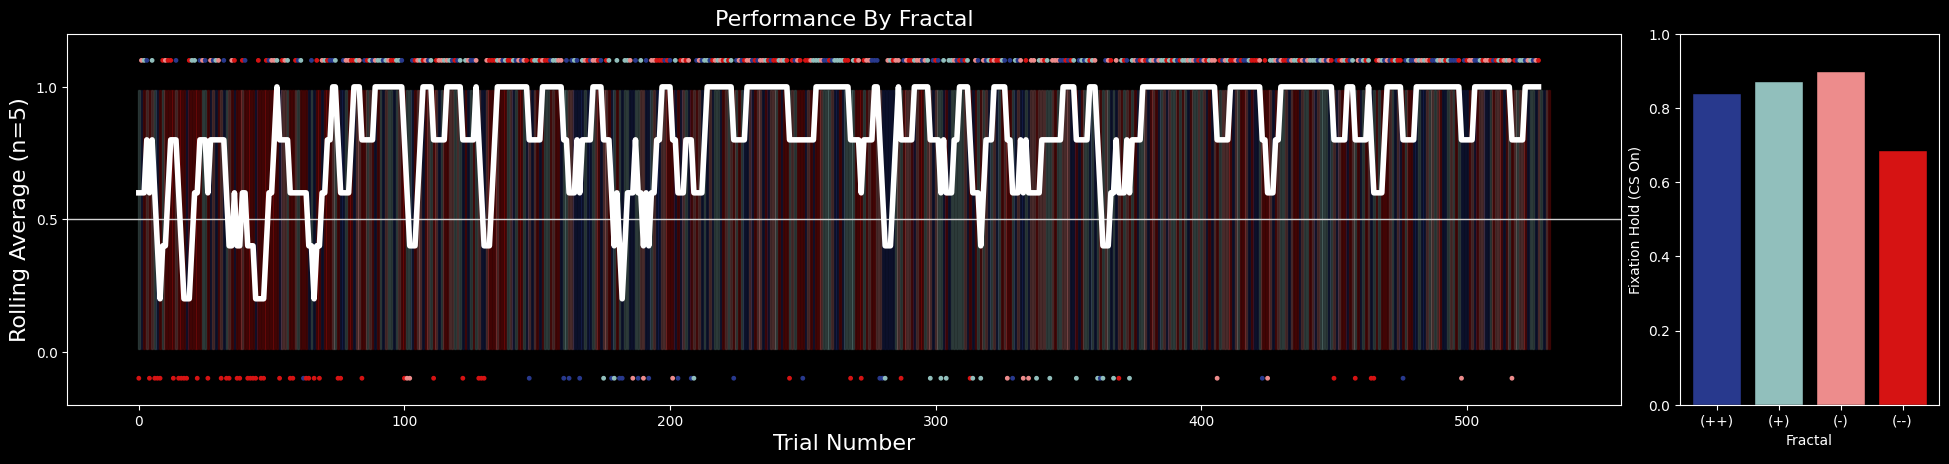

  session_latency.png saved.


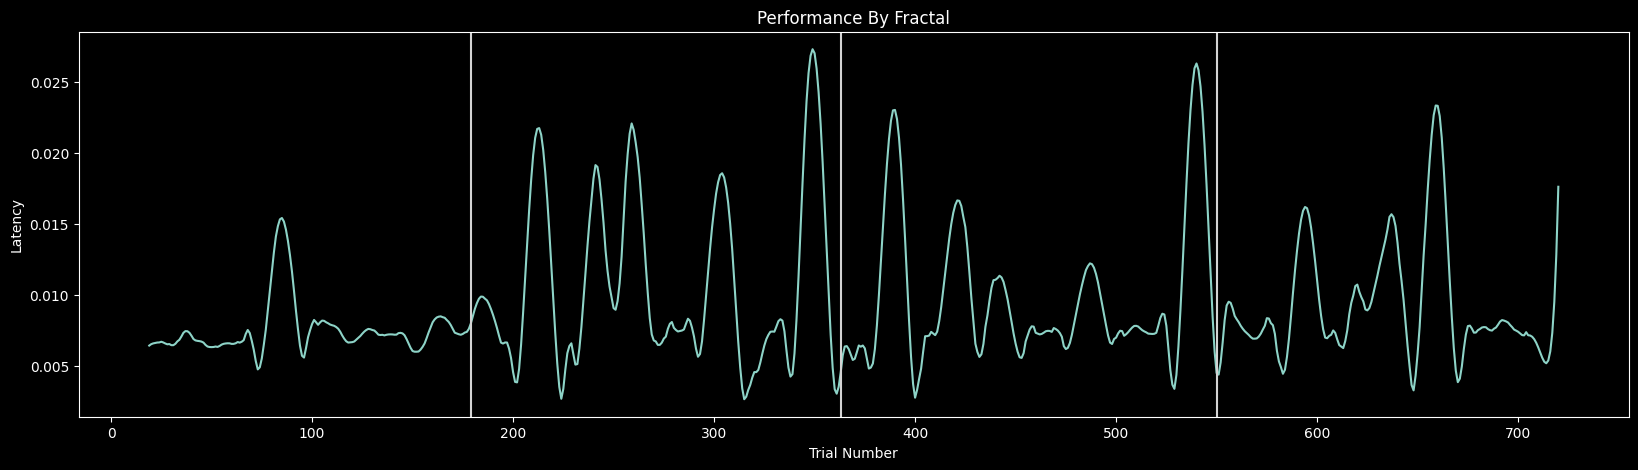

  epoch_hist.png saved.


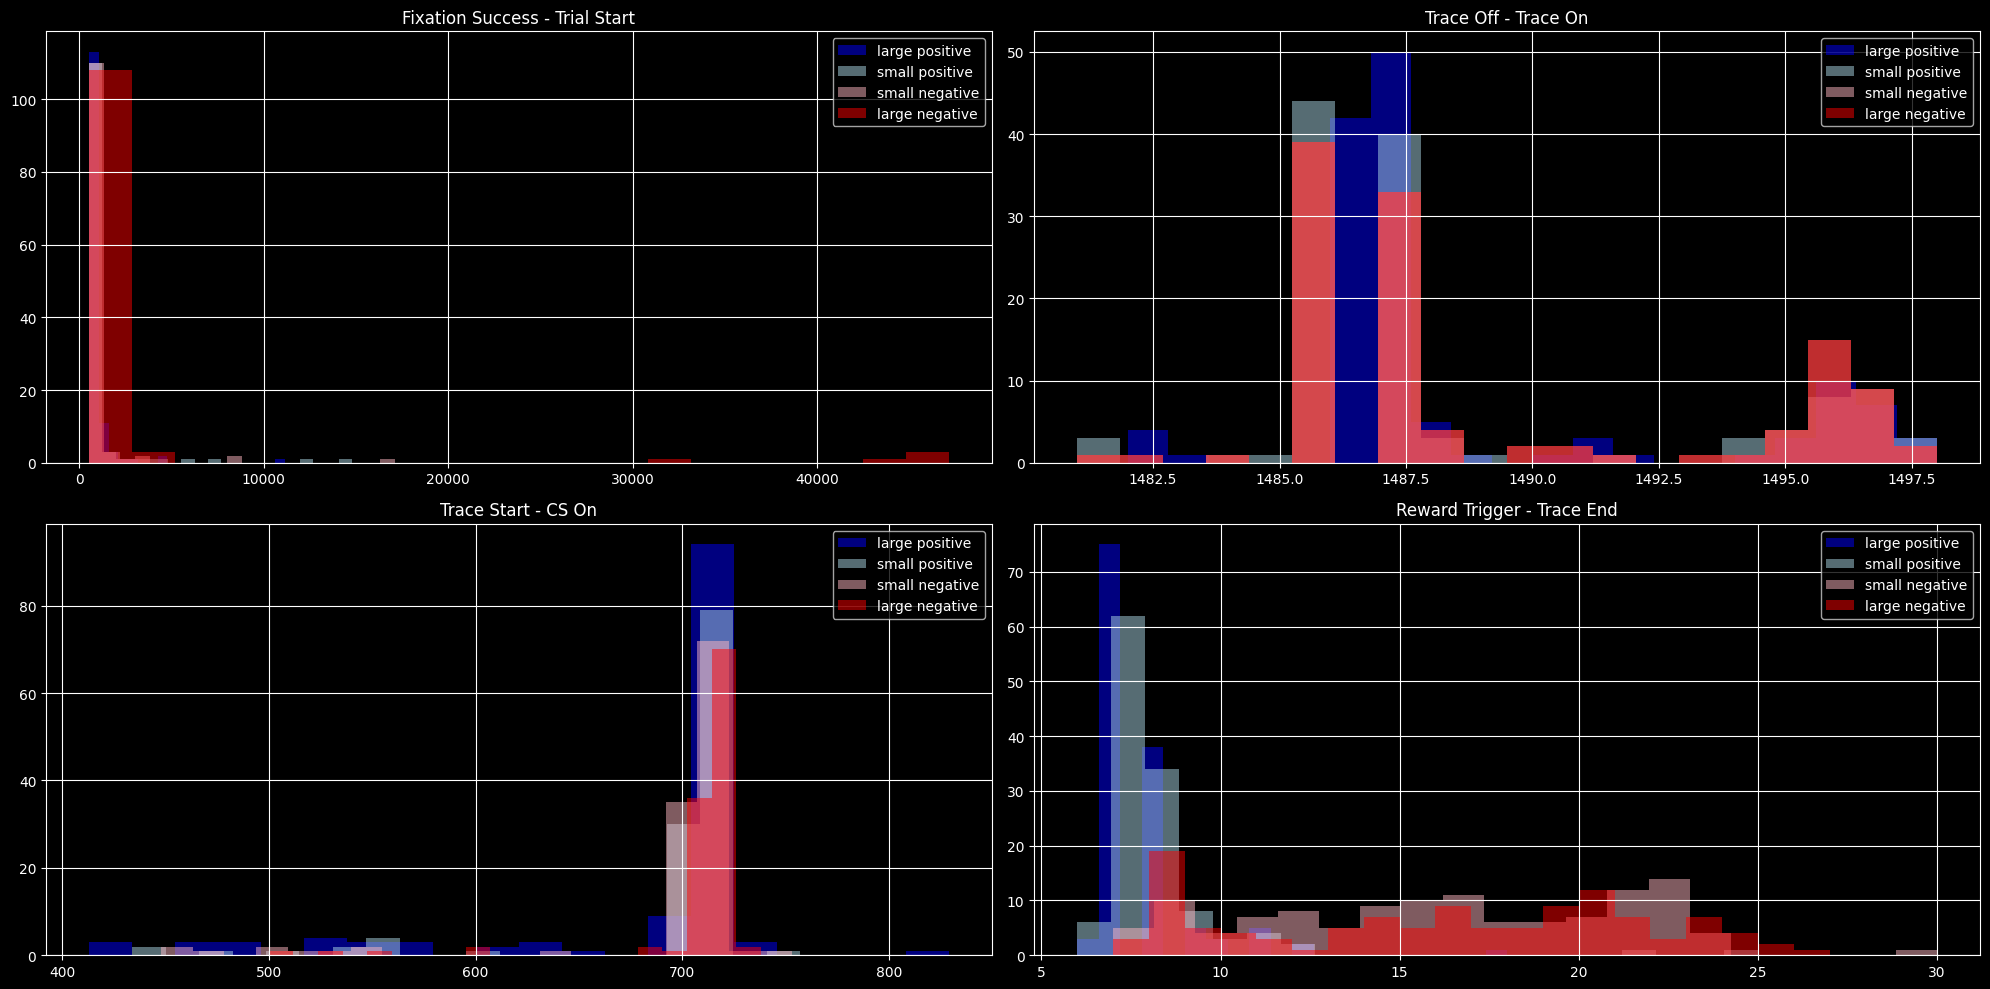

  lick_vs_blink.png saved.
Block: 1
  Valence 1.0: Lick Correlation: -0.267 | Blink Correlation: 0.025
  Valence 0.5: Lick Correlation: 0.002 | Blink Correlation: -0.018
  Valence -0.5: Lick Correlation: -0.381 | Blink Correlation: -0.17
  Valence -1.0: Lick Correlation: 0.24 | Blink Correlation: -0.084
Block: 2
  Valence 1.0: Lick Correlation: 0.233 | Blink Correlation: -0.021
  Valence 0.5: Lick Correlation: -0.225 | Blink Correlation: -0.624
  Valence -0.5: Lick Correlation: -0.192 | Blink Correlation: -0.165
  Valence -1.0: Lick Correlation: 0.194 | Blink Correlation: -0.217
Block: 3
  Valence 1.0: Lick Correlation: 0.056 | Blink Correlation: -0.397
  Valence 0.5: Lick Correlation: -0.219 | Blink Correlation: 0.32
  Valence -0.5: Lick Correlation: 0.225 | Blink Correlation: 0.055
  Valence -1.0: Lick Correlation: -0.07 | Blink Correlation: -0.367
Block: 4
  Valence 1.0: Lick Correlation: 0.322 | Blink Correlation: -0.609
  Valence 0.5: Lick Correlation: -0.255 | Blink Correlation: 

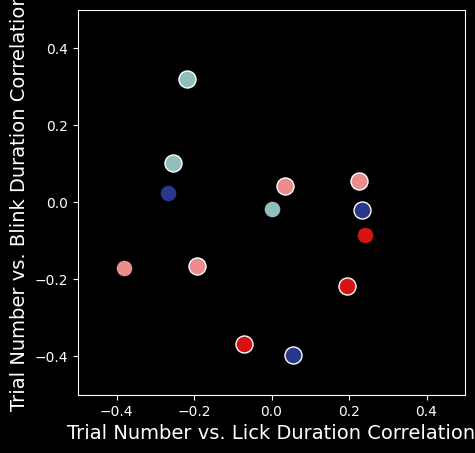

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.svg saved.
  t_test_lick-duration_1.png saved.


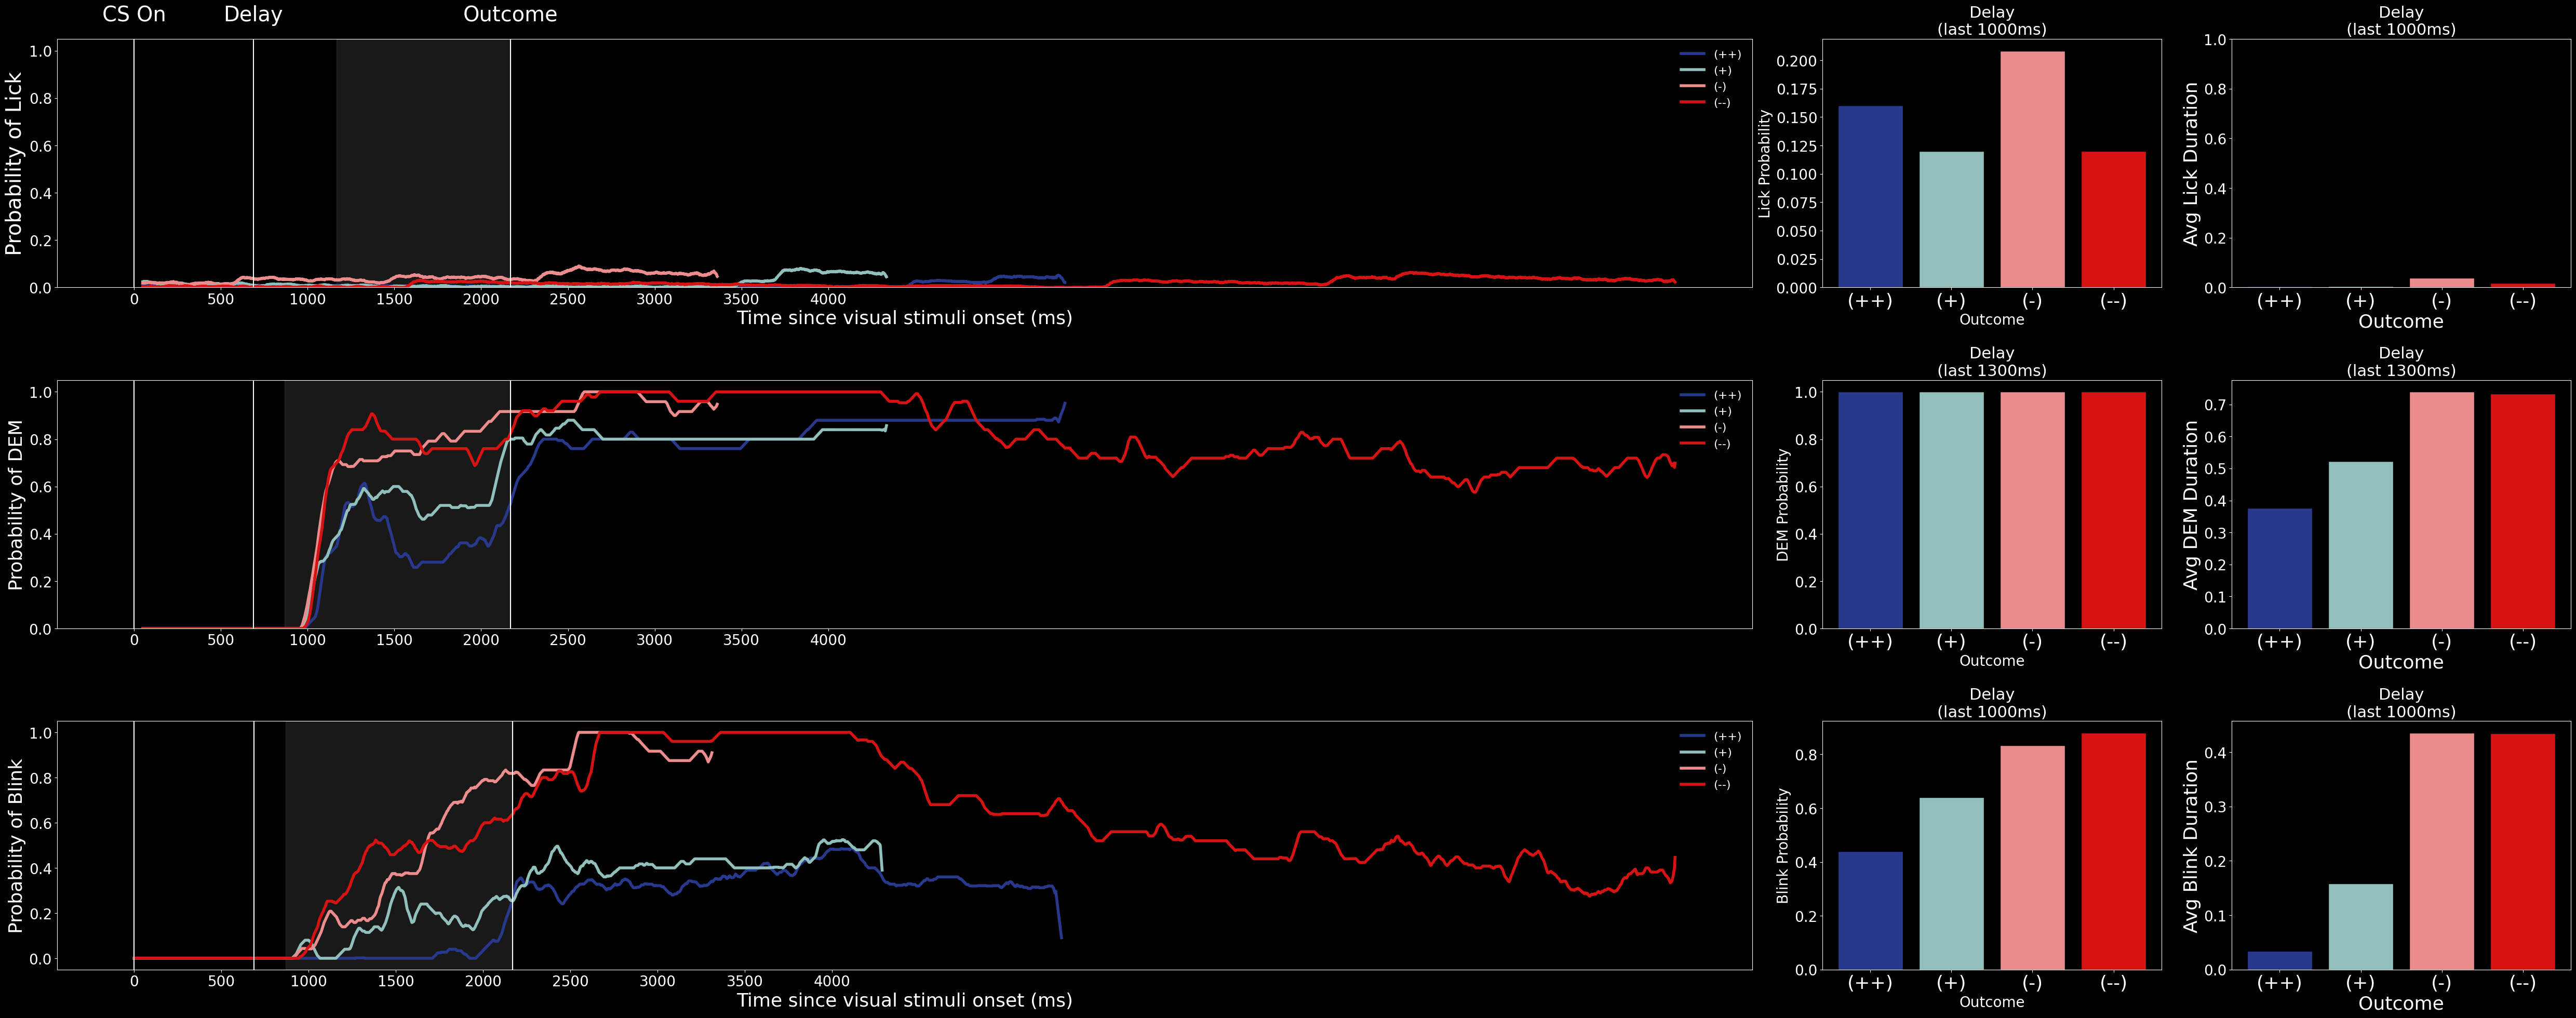

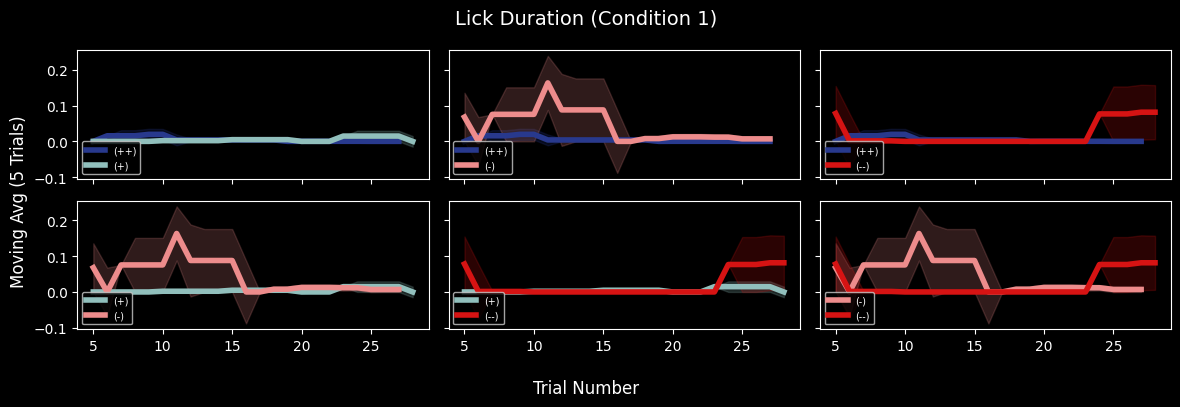

  t_test_DEM-duration_1.png saved.


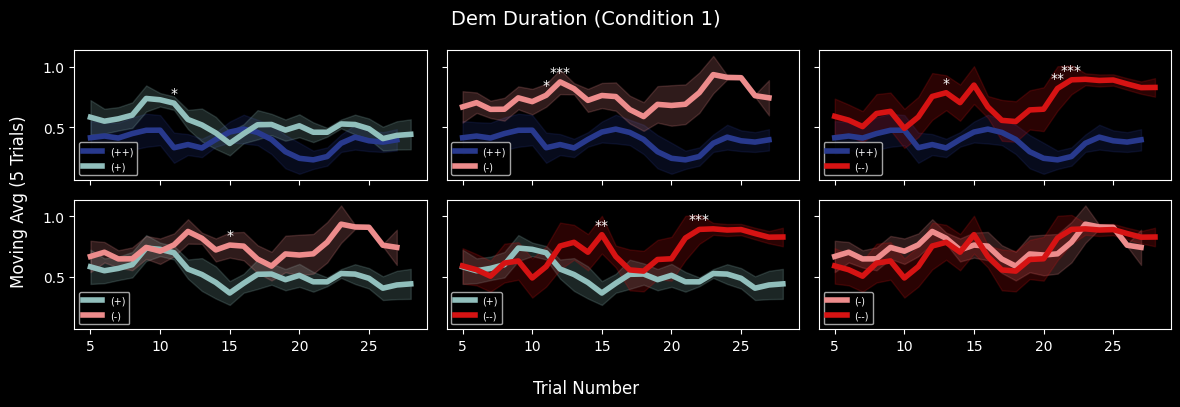

  t_test_blink-duration_1.png saved.


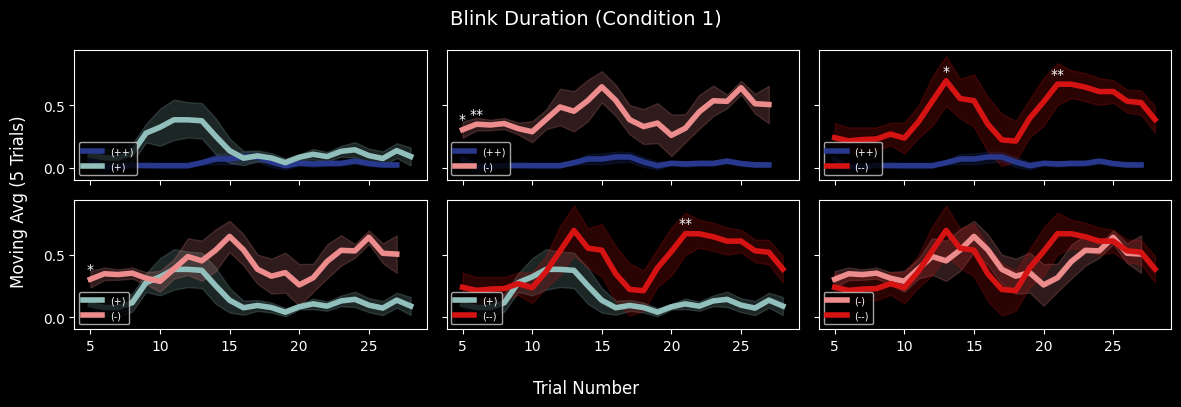

  raster_by_cond_2.svg saved.
  t_test_lick-duration_2.png saved.


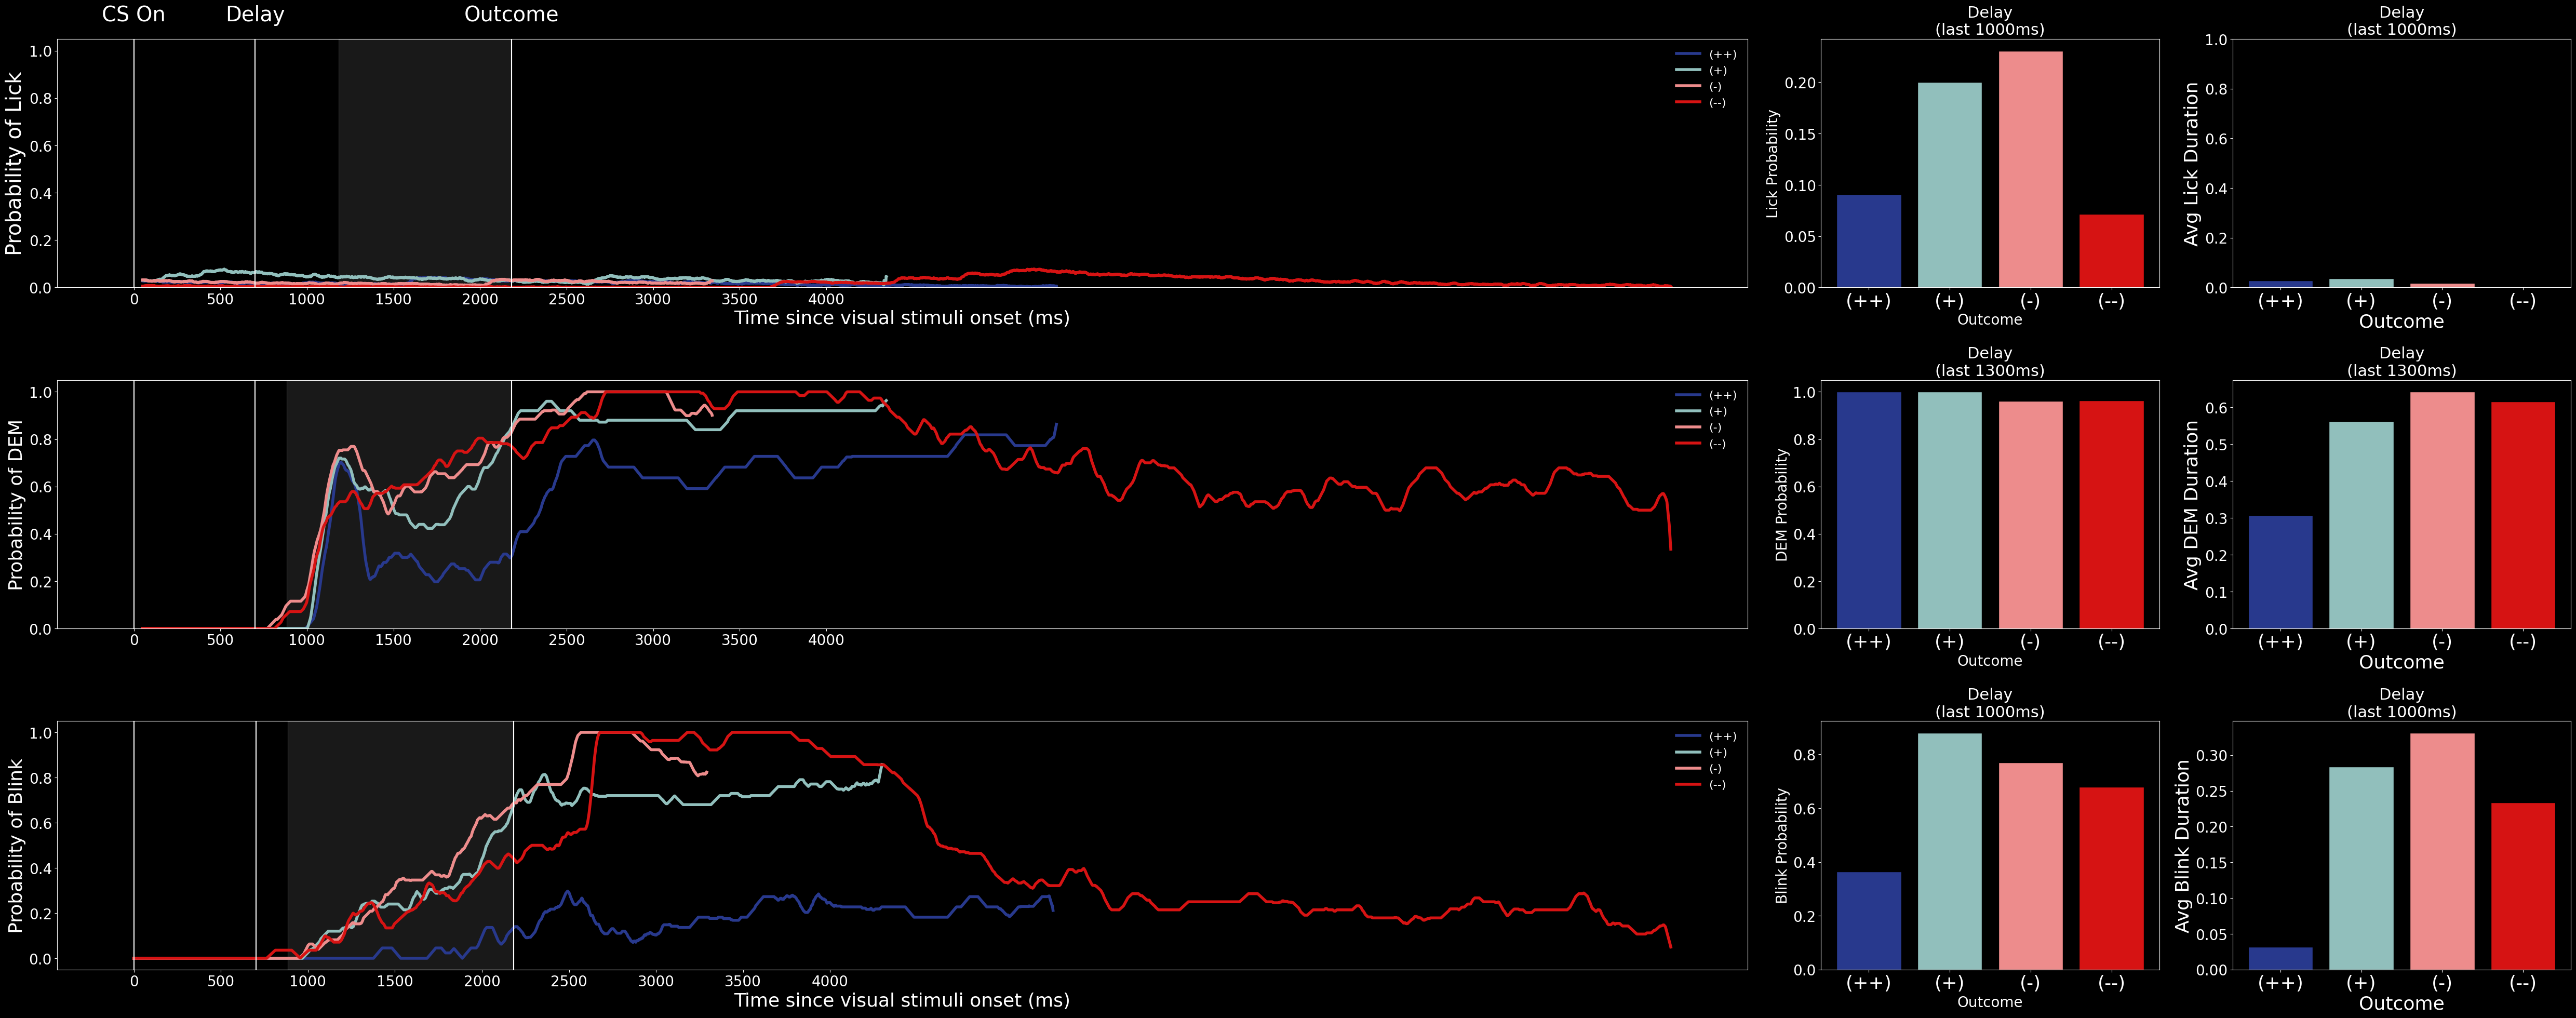

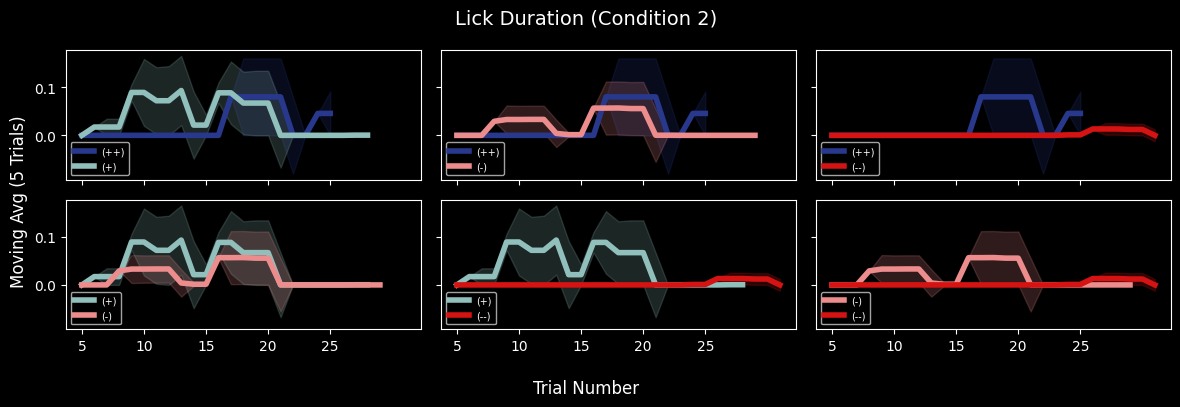

  t_test_DEM-duration_2.png saved.


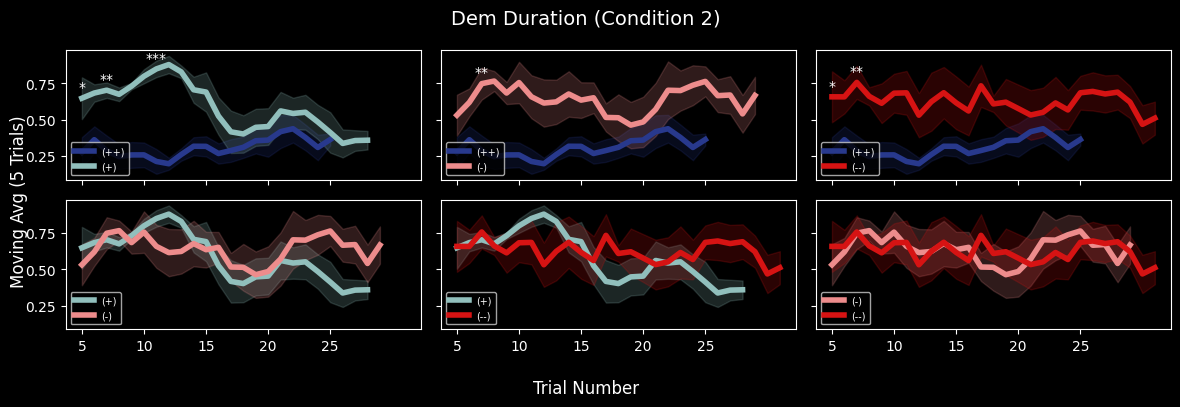

  t_test_blink-duration_2.png saved.


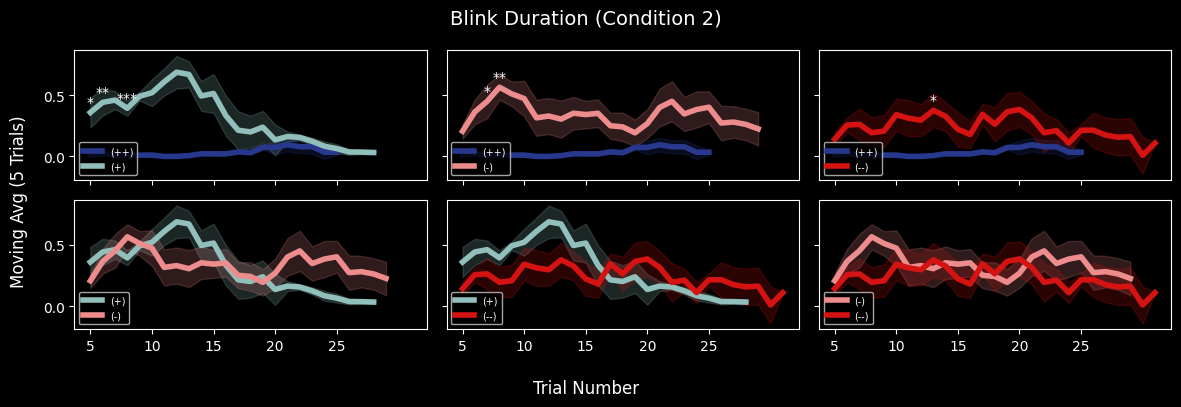

Not enough trials for condition: 3
Not enough trials for condition: 4
  raster_by_cond_1.svg saved.
 [0.0, 0.5, 1.0] ANOVA 0.214 | P-value: 8.07E-01
  (0, 1) T-value: 0.892 P-value: 3.77E-01 |  Z-value: 0.647 P-value: 5.17E-01
    0 Lick Mean: 0.014 Lick Std: 0.062 Trials: 38
    1 Lick Mean: 0.004 Lick Std: 0.017 Trials: 18
  (0, 2) T-value: 0.171 P-value: 8.65E-01 |  Z-value: 0.16 P-value: 8.73E-01
    0 Lick Mean: 0.014 Lick Std: 0.062 Trials: 38
    2 Lick Mean: 0.011 Lick Std: 0.049 Trials: 20
  (1, 2) T-value: -0.595 P-value: 5.58E-01 |  Z-value: -0.57 P-value: 5.69E-01
    1 Lick Mean: 0.004 Lick Std: 0.017 Trials: 18
    2 Lick Mean: 0.011 Lick Std: 0.049 Trials: 20
  grant_lick.png saved.
 [0.0, 0.5, 1.0] ANOVA 17.432 | P-value: 6.47E-07
  (0, 1) T-value: -4.536 P-value: 1.22E-04 |  Z-value: -4.979 P-value: 6.40E-07
    0 DEM Mean: 0.409 DEM Std: 0.209 Trials: 38
    1 DEM Mean: 0.744 DEM Std: 0.262 Trials: 17
  (0, 2) T-value: -4.744 P-value: 3.42E-05 |  Z-value: -5.013 P-val

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  lick_blink_hist.png saved.
  lick_blink_cdf.png saved.
Lick
  (--) vs (-): ks_stat: 0.03, p_val: 1.00E+00
  (--) vs (+): ks_stat: 0.05, p_val: 9.94E-01
  (--) vs (++): ks_stat: 0.07, p_val: 8.69E-01
  (-) vs (+): ks_stat: 0.08, p_val: 8.24E-01
  (-) vs (++): ks_stat: 0.07, p_val: 8.73E-01
  (+) vs (++): ks_stat: 0.09, p_val: 6.85E-01
Blink
  (--) vs (-): ks_stat: 0.36, p_val: 1.09E-07
  (--) vs (+): ks_stat: 0.52, p_val: 5.63E-16
  (--) vs (++): ks_stat: 0.42, p_val: 2.13E-10
  (-) vs (+): ks_stat: 0.29, p_val: 6.00E-05
  (-) vs (++): ks_stat: 0.15, p_val: 1.02E-01
  (+) vs (++): ks_stat: 0.16, p_val: 8.82E-02
Total Eye Positions: 138000
Histogram Positions: 133108
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.0004 0.     0.     0.     0.     0.    ]
 [0.0031 0.0001 0.007  0.0061 0.0033 0.0015 0.     0.    ]
 [0.0106 0.0084 0.0226 0.2791 0.2289 0.0911 0.006  0.    ]
 [0.0018 0.0019 0.023  0.047

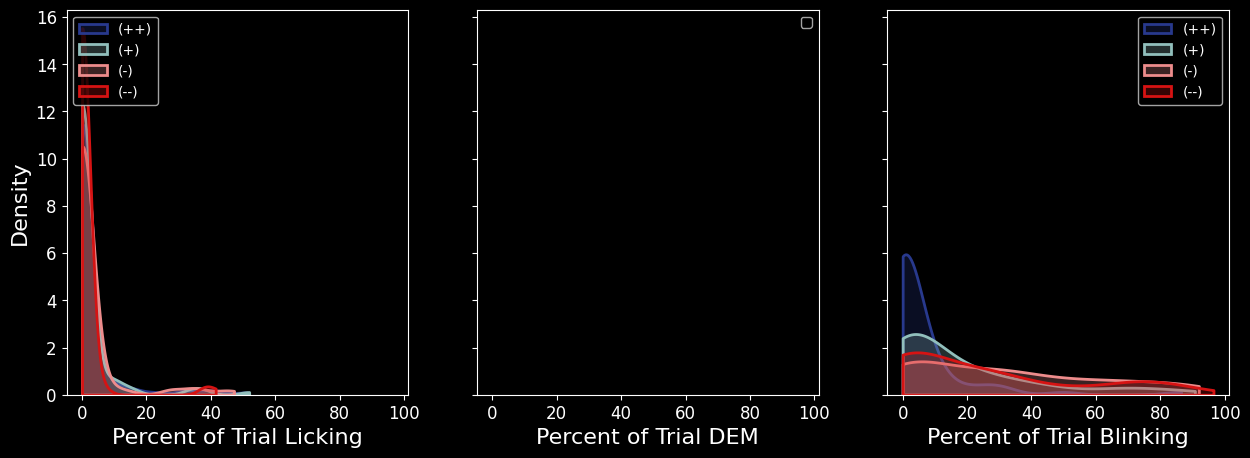

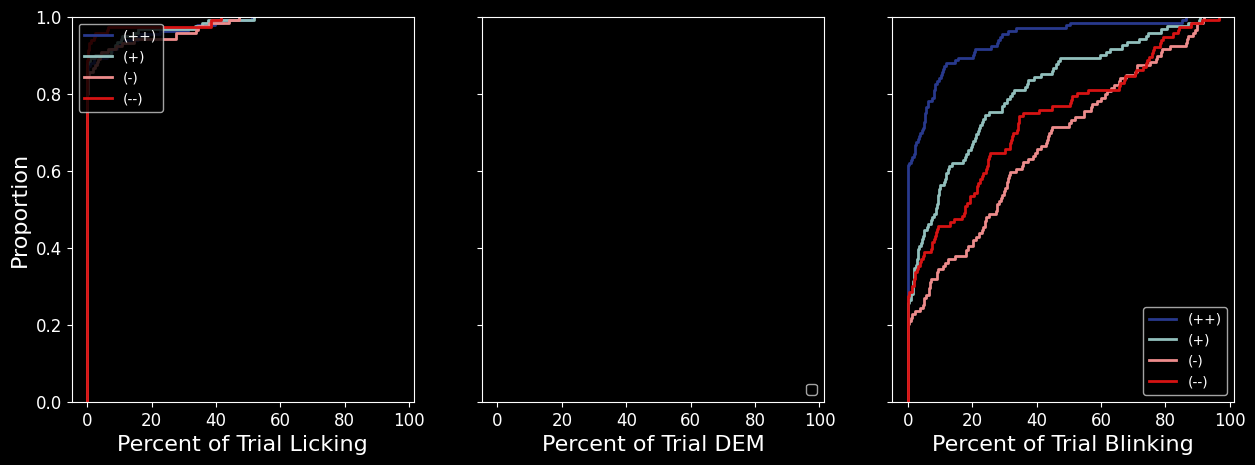

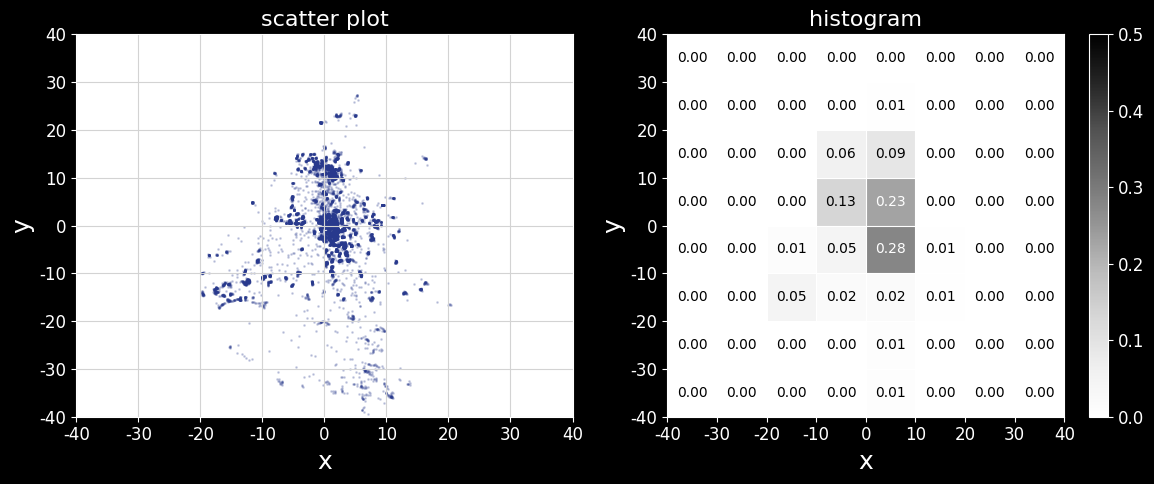

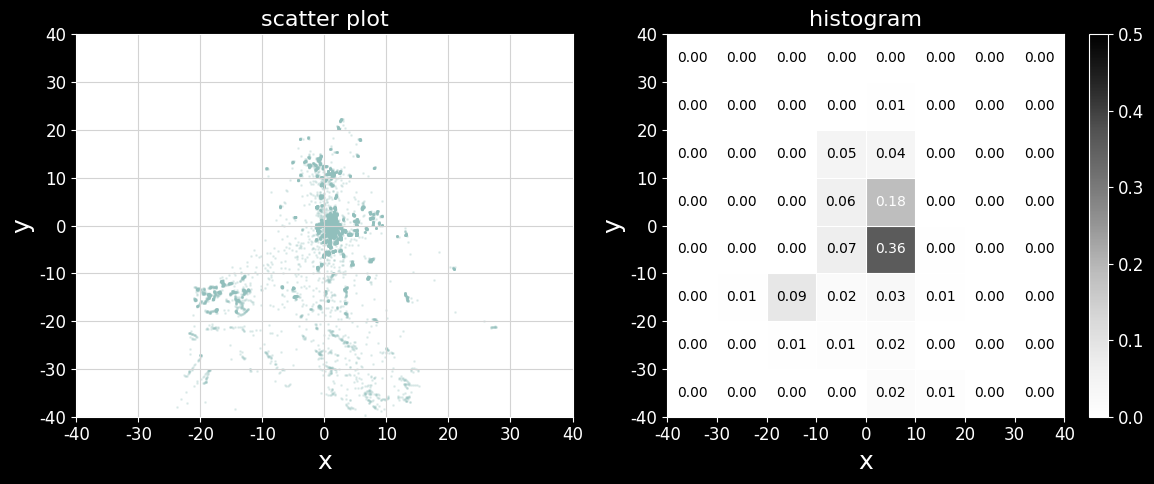

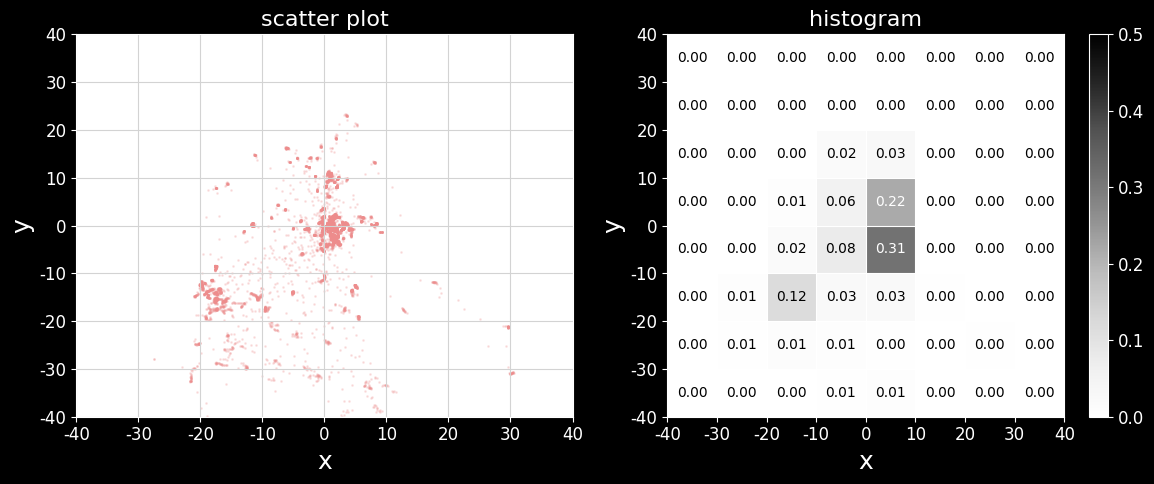

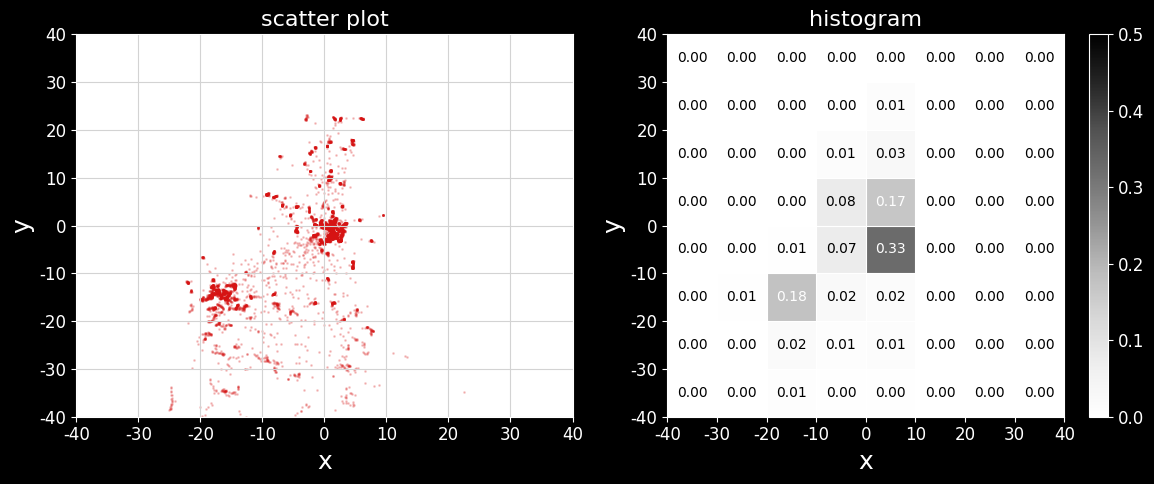

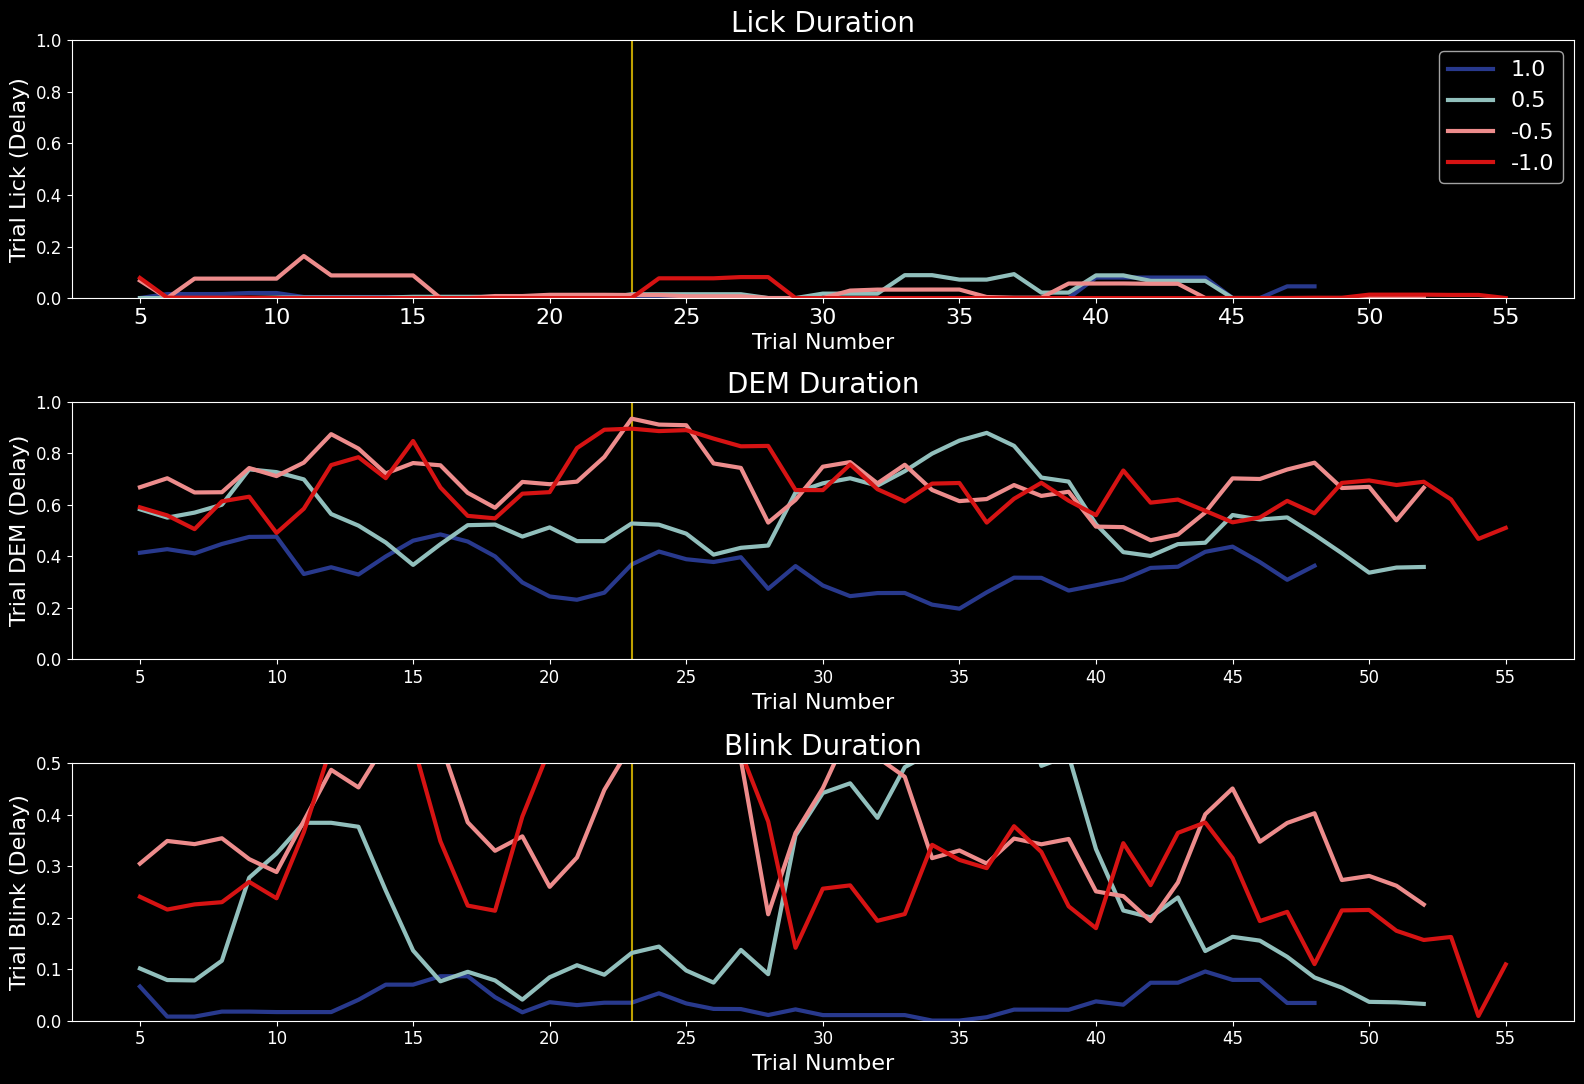

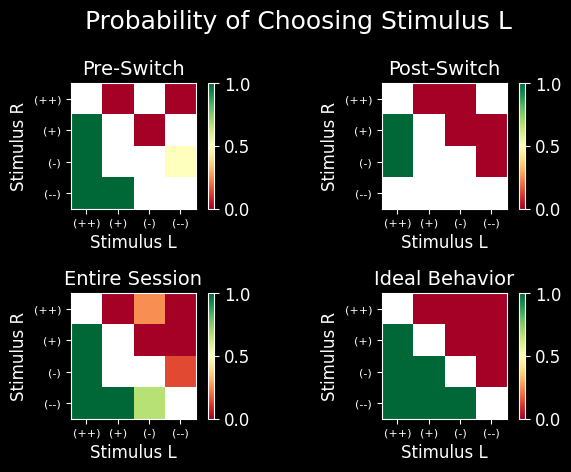

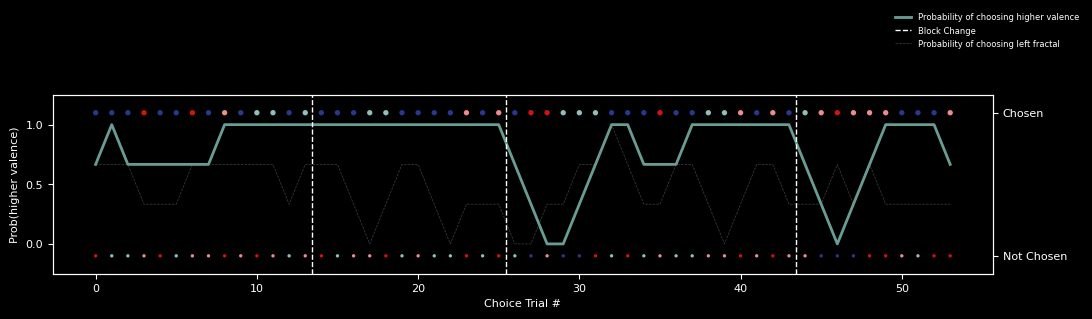

Reward vs. Airpuff Accuracy: 0.59 (+/- 0.24)
  lick_duration: 0.175
  blink_duration_offscreen: -0.608
  pupil_raster_window_avg: -1.042
  blink_duration_window: -0.953
  eye_distance: 0.0


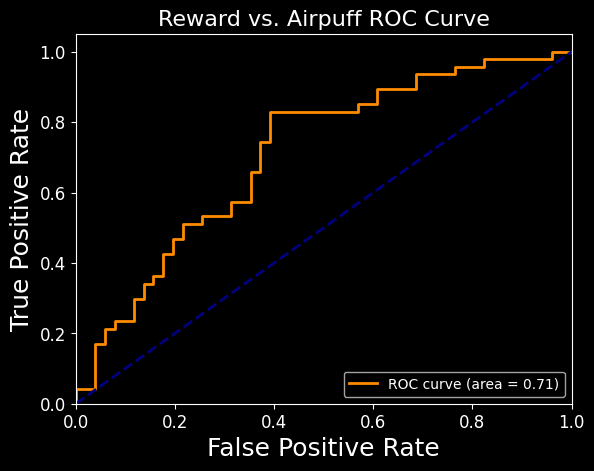

Large Reward vs. Small Reward Accuracy: 0.57 (+/- 0.22)
  lick_duration: -0.036
  blink_duration_offscreen: -0.147
  pupil_raster_window_avg: -0.39
  blink_duration_window: -0.455
  eye_distance: -0.004


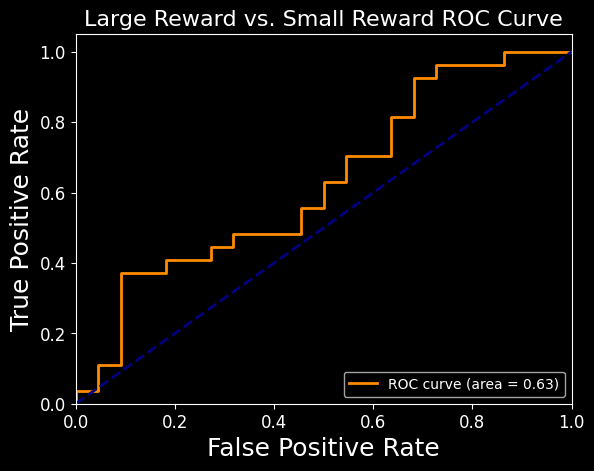

Large Airpuff vs. Small Airpuff Accuracy: 0.54 (+/- 0.10)
  lick_duration: 0.026
  blink_duration_offscreen: 0.436
  pupil_raster_window_avg: -0.103
  blink_duration_window: -0.05
  eye_distance: -0.001


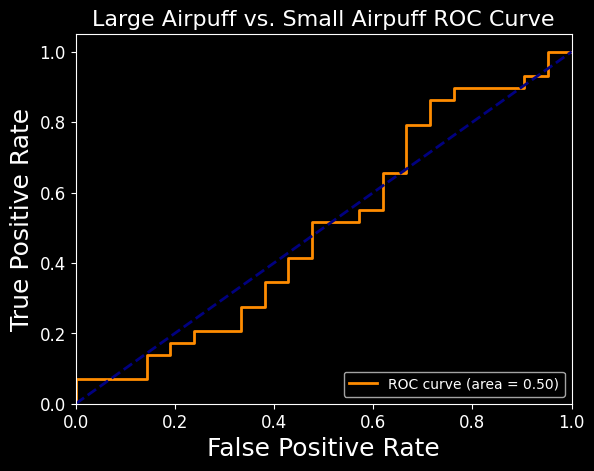


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20240801_aragorn.md
Writing to excel...
  Writing 240801 to Emotion_Tracker.xlsx


In [5]:
from analyses.run_functions import run_functions

dates = session_df['date'].unique()
for date in dates:
	print(date)
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
															behavioral_code_dict, error_dict)

# session_obj = run_functions(session_df, session_obj, path_obj, 
# 														behavioral_code_dict, error_dict)

# new dataframe not including valence = 0 or 0.25
# session_df_pos_neg = session_df.loc[session_df['valence'].isin([-1, -0.5, 0.5, 1]) &
# 																		session_df['valence_1'].isin([-1, -0.5, 0.5, 1])]
# session_obj = run_functions(session_df_pos_neg, session_obj, path_obj, behavioral_code_dict, error_dict)

In [ ]:
session_df_reinforcement['']

### Look at lick rate by block for novel fractals

Analyzing Lick Difference Between Blocks
  Block 1: ~3.73 drops/trial
    Valence -1.0: ~0.0  outcome/trial (n=28)
    Valence -0.5: ~0.0  outcome/trial (n=27)
    Valence 0.5 : ~5.0  outcome/trial (n=28)
    Valence 1.0 : ~10.0 outcome/trial (n=27)
  Block 2: ~3.45 drops/trial
    Valence -1.0: ~0.0  outcome/trial (n=31)
    Valence -0.5: ~0.0  outcome/trial (n=29)
    Valence 0.5 : ~5.0  outcome/trial (n=28)
    Valence 1.0 : ~10.0 outcome/trial (n=25)
  Block 3: ~3.69 drops/trial
    Valence -1.0: ~0.0  outcome/trial (n=25)
    Valence -0.5: ~0.0  outcome/trial (n=29)
    Valence 0.5 : ~5.0  outcome/trial (n=27)
    Valence 1.0 : ~10.0 outcome/trial (n=26)
  Block 4: ~3.89 drops/trial
    Valence -1.0: ~0.0  outcome/trial (n=26)
    Valence -0.5: ~0.0  outcome/trial (n=24)
    Valence 0.5 : ~5.0  outcome/trial (n=27)
    Valence 1.0 : ~10.0 outcome/trial (n=27)
Analyzing Blink Difference Between Blocks
  Block 1: ~0.38 drops/trial
    Valence -1.0: ~1.0  outcome/trial (n=28)
    Val

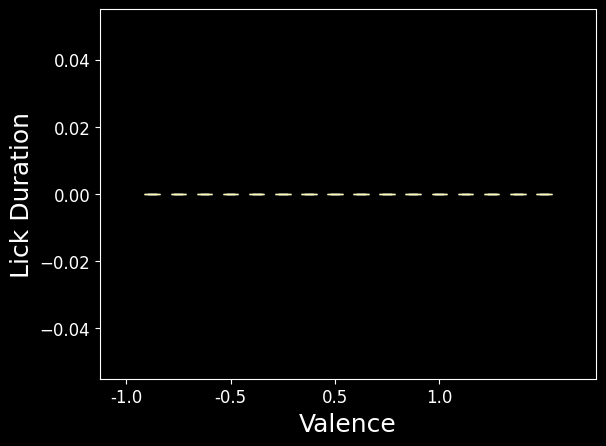

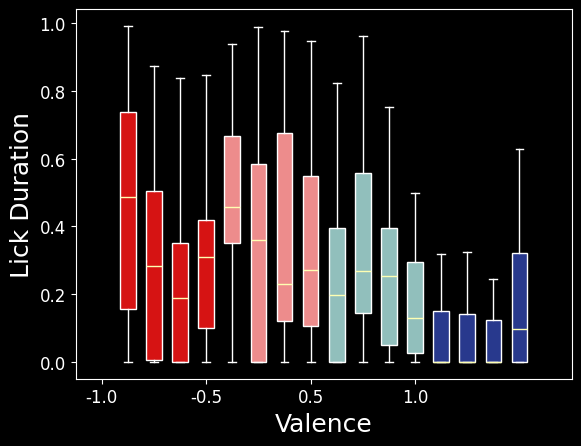

In [12]:
# see the average number of rewarded reinforcement trials in block 1 vs block 2
for behavior_field in ['lick_duration', 'blink_duration_window']:
	behavior = behavior_field.split('_')[0]
	print(f'Analyzing {behavior.capitalize()} Difference Between Blocks')
	f, ax = plt.subplots(1,1, sharey=True)
	session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
	for block in session_df_reinforcement['block'].unique():
		session_df_block = session_df_reinforcement[session_df_reinforcement['block'] == block]
		# skip if <10 trials in the block
		if len(session_df_block) < 10:
			continue
		if behavior == 'lick':
			outcome = 'reward_drops_1'
		else:
			outcome = 'airpuff_mag_1'
		avg_reward_drops_block = session_df_block[outcome].mean()
		print(f'  Block {block}: ~{round(avg_reward_drops_block, 2)} drops/trial')
		unique_valences = sorted(session_df_reinforcement['valence'].unique())
		for vix, valence in enumerate(unique_valences):
			avg_reward_drops_block_valence = session_df_block[session_df_block['valence'] == valence][outcome]
			avg_reward_drops_block_valence_mean = avg_reward_drops_block_valence.mean()
			print(f'    Valence {valence:<4}: ~{round(avg_reward_drops_block_valence_mean, 2):<4} outcome/trial (n={len(avg_reward_drops_block_valence)})')
			session_df_block_fractal = session_df_block[session_df_block['valence'] == valence]
			lick_rate_fractal = session_df_block_fractal[behavior_field].tolist()
			# double box plot of lick rate without outliers where each block value is next to each other
			color = session_obj.valence_colors[valence]
			# set color to color
			pos_shift = 0.25*block
			ax.boxplot(lick_rate_fractal, positions=[vix + pos_shift], patch_artist=True, boxprops=dict(facecolor=color), showfliers=False)
		# set x tick labels for the middle of the double box plot
		ax.set_xticks(range(len(unique_valences)))
		ax.set_xticklabels(unique_valences)
		ax.set_xlabel('Valence')
		ax.set_ylabel('Lick Duration')

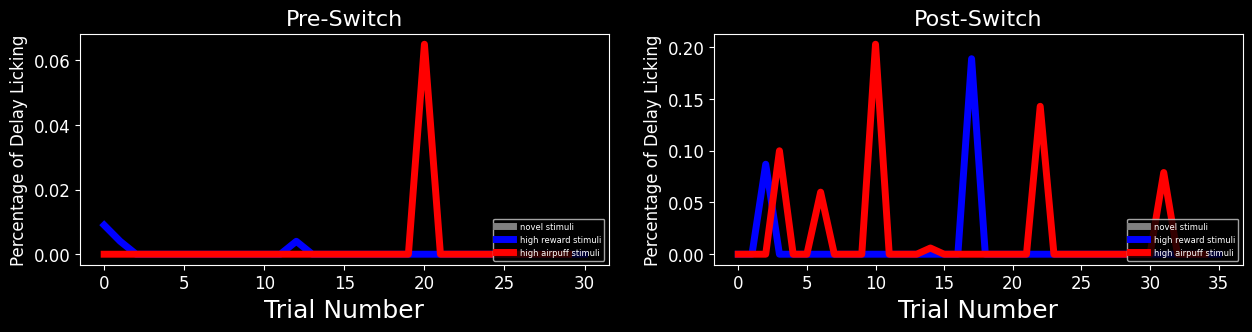

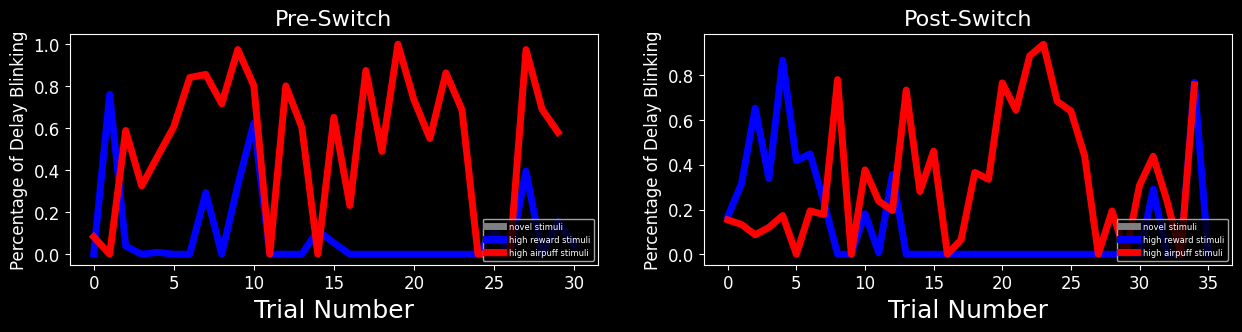

In [11]:
def novel_fractal_summary(session_df):
	session_df_correct = session_df[session_df['correct'] == 1]
	session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
	
	f, axarr = plt.subplots(1, 2, figsize=(15, 3))
	for i in [1,2]:
		session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
		session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
		session_novel = session_df_reinforcement.loc[(session_df_reinforcement['fractal_chosen_novel'] == '_fractal_novel') & (session_df_reinforcement['block'] == i)]
		session_high_reward_lick = session_high_reward['lick_duration']
		session_high_airpuff_lick = session_high_airpuff['lick_duration']
		session_novel_lick = session_novel['lick_duration']
		axarr[i-1].plot(range(len(session_novel_lick)), session_novel_lick, label='novel stimuli', color='grey', lw=5)
		axarr[i-1].plot(range(len(session_high_reward_lick)), session_high_reward_lick, label='high reward stimuli', color='blue', lw=5)
		axarr[i-1].plot(range(len(session_high_airpuff_lick)), session_high_airpuff_lick, label='high airpuff stimuli', color='red', lw=5)
		session_neutral = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) &
																									 (session_df_reinforcement['fractal_chosen_novel'] != '_fractal_novel') & 
																									 (session_df_reinforcement['block'] == i)]
		if len(session_neutral) > 0:
			session_neutral_lick = session_neutral['lick_duration']
			axarr[i-1].plot(range(len(session_neutral_lick)), session_neutral_lick, label='neutral stimuli', color='yellow', lw=5)
		# # select row with index block_change
		axarr[i-1].set_xlabel('Trial Number')
		axarr[i-1].set_ylabel('Percentage of Delay Licking', fontsize=12)
		if i == 1:
			axarr[i-1].set_title('Pre-Switch')
		else:
			axarr[i-1].set_title('Post-Switch')
		axarr[i-1].legend(loc='lower right', fontsize=6)
	plt.show()

	f, axarr = plt.subplots(1, 2, figsize=(15, 3))
	for i in [1,2]:
		session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
		session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
		session_novel = session_df_reinforcement.loc[(session_df_reinforcement['fractal_chosen_novel'] == '_fractal_novel') & (session_df_reinforcement['block'] == i)]
		session_novel_blink = session_novel['blink_duration_window']
		session_high_reward_blink = session_high_reward['blink_duration_window']
		session_high_airpuff_blink = session_high_airpuff['blink_duration_window']
		axarr[i-1].plot(range(len(session_novel_blink)), session_novel_blink, label='novel stimuli', color='grey', lw=5)
		axarr[i-1].plot(range(len(session_high_reward_blink)), session_high_reward_blink, label='high reward stimuli', color='blue', lw=5)
		axarr[i-1].plot(range(len(session_high_airpuff_blink)), session_high_airpuff_blink, label='high airpuff stimuli', color='red', lw=5)
		session_neutral = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) &
																									 (session_df_reinforcement['fractal_chosen_novel'] != '_fractal_novel') & 
																									 (session_df_reinforcement['block'] == i)]
		if len(session_neutral) > 0:
			session_neutral_blink = session_neutral['blink_duration_window']
			axarr[i-1].plot(range(len(session_neutral_blink)), session_neutral_blink, label='neutral stimuli', color='yellow', lw=5)
		# # select row with index block_change
		axarr[i-1].set_xlabel('Trial Number')
		axarr[i-1].set_ylabel('Percentage of Delay Blinking', fontsize=12)
		axarr[i-1].legend(loc='lower right', fontsize=6)
		if i == 1:
			axarr[i-1].set_title('Pre-Switch')
		else:
			axarr[i-1].set_title('Post-Switch')
	plt.show()

novel_fractal_summary(session_df_correct)

***
## Valence Trial Analyses
### Higher Valence and Reaction Time Performance on Choice Trials

In [18]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.909 (291/320)
   Valence 1.0: 0.933 (70/75)
   Valence 0.5: 0.874 (76/87)
   Valence -0.5: 0.935 (72/77)
   Valence -1.0: 0.901 (73/81)
 Percent successful choice trials: 0.791 (34/43)
   Valence Pair [-1.0, -0.5]: 1.0 (7/7)
   Valence Pair [-1.0, 0.5]: 1.0 (3/3)
   Valence Pair [-1.0, 1.0]: 1.0 (3/3)
   Valence Pair [-0.5, 0.5]: 0.8 (4/5)
   Valence Pair [0.5, 1.0]: 0.706 (12/17)
   Valence Pair [-0.5, 1.0]: 0.625 (5/8)
 Percent left choice trials: 0.529 (18/34)
 Percent higher valence choice trials: 0.618 (21/34)
   Valence Pair [-0.5, 1.0]: 1.0 (5/5)
   Valence Pair [-1.0, 0.5]: 1.0 (3/3)
   Valence Pair [-1.0, -0.5]: 0.714 (5/7)
   Valence Pair [-1.0, 1.0]: 0.667 (2/3)
   Valence Pair [-0.5, 0.5]: 0.5 (2/4)
   Valence Pair [0.5, 1.0]: 0.333 (4/12)


Reaction Time on Choice Trials
 Valence: -1.0
   Reaction Time: 233.667
   Valence Not Chosen: -0.5 150.5 (2)
   Valence Not Chosen: 1.0 400.0 (1)
 Valence: -0.5
   Reactio

In [19]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
							[['lick_duration',
								'blink_duration_offscreen',
								'pupil_raster_window_avg',
								'blink_duration_window',
								'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg  \
valence                                                                     
-1.0          0.287767                  0.742118                 0.195111   
-0.5          0.276042                  0.730823                 0.146560   
 0.5          0.592671                  0.514565                 0.130769   
 1.0          0.557871                  0.554088                 0.130385   

         blink_duration_window  eye_distance  
valence                                       
-1.0                  0.238240    106.094464  
-0.5                  0.183632     70.934515  
 0.5                  0.163836     81.168368  
 1.0                  0.173692     75.555692

IndexError: index 0 is out of bounds for axis 0 with size 0

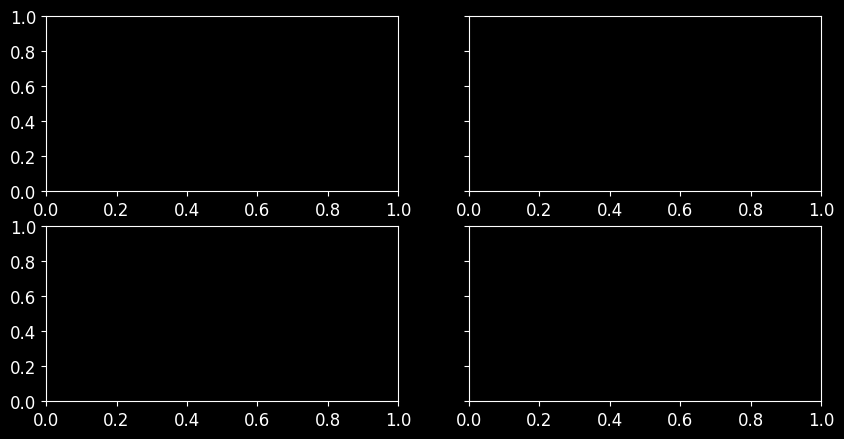

In [14]:
f, axarr = plt.subplots(2, 2, figsize=(10, 5), sharey=True)

# valence = 1
fractal_b_day_1 = session_df_reinforcement.loc[(session_df_reinforcement['date'] == '240613') &
																							 (session_df_reinforcement['fractal_chosen_novel'] == '_fractal_B') &
																							 (session_df_reinforcement['block'] == 1)]
fractal_d_day_2 = session_df_reinforcement.loc[(session_df_reinforcement['date'] == '240614') &
																							 (session_df_reinforcement['fractal_chosen_novel'] == '_fractal_D') &
																							 (session_df_reinforcement['block'] == 1) &
																							 (session_df_reinforcement['valence'] == 1)]
valence = fractal_b_day_1['valence'].unique()[0]
axarr[0][0].plot(range(len(fractal_b_day_1)), fractal_b_day_1['lick_duration'], color='blue', lw=3)
# change the color slightly for the second day
# all blue options are lightblue, skyblue, steelblue, royalblue, blue, darkblue, navy, midnightblue
axarr[0][0].plot(range(len(fractal_d_day_2)), fractal_d_day_2['lick_duration'], color='royalblue', lw=3)
axarr[0][0].set_title('Large Reward')
# valence = 0.5
fractal_a_day_1 = session_df_reinforcement.loc[(session_df_reinforcement['date'] == '240613') &
																							 (session_df_reinforcement['fractal_chosen_novel'] == '_fractal_A') &
																							 (session_df_reinforcement['block'] == 1)]
axarr[0][1].plot(range(len(fractal_a_day_1)), fractal_a_day_1['lick_duration'], color='lightblue', lw=3)
fractal_b_day_2 = session_df_reinforcement.loc[(session_df_reinforcement['date'] == '240614') & 
																							 (session_df_reinforcement['fractal_chosen_novel'] == '_fractal_B') &
																							 (session_df_reinforcement['block'] == 1) & 
																							 (session_df_reinforcement['valence'] == 0.5)]
axarr[0][1].plot(range(len(fractal_b_day_2)), fractal_b_day_2['lick_duration'], color='skyblue', lw=3)
axarr[0][1].set_title('Small Reward')
# valence = -0.5
fractal_c_day_1 = session_df_reinforcement.loc[(session_df_reinforcement['date'] == '240613') &
																							 (session_df_reinforcement['fractal_chosen_novel'] == '_fractal_C') &
																							 (session_df_reinforcement['block'] == 1)]
axarr[1][0].plot(range(len(fractal_c_day_1)), fractal_c_day_1['lick_duration'], color='red')
fractal_a_day_2 = session_df_reinforcement.loc[(session_df_reinforcement['date'] == '240614') &
																							 (session_df_reinforcement['fractal_chosen_novel'] == '_fractal_A') &
																							 (session_df_reinforcement['block'] == 1) &
																							 (session_df_reinforcement['valence'] == -0.5)]
axarr[1][0].plot(range(len(fractal_a_day_2)), fractal_a_day_2['lick_duration'], color='pink')
axarr[1][0].set_title('Small Airpuff')
# valence = -1
fractal_d_day_1 = session_df_reinforcement.loc[(session_df_reinforcement['date'] == '240613') &
																							 (session_df_reinforcement['fractal_chosen_novel'] == '_fractal_D') &
																							 (session_df_reinforcement['block'] == 1)]
axarr[1][1].plot(range(len(fractal_d_day_1)), fractal_d_day_1['lick_duration'], color='red')
fractal_c_day_2 = session_df_reinforcement.loc[(session_df_reinforcement['date'] == '240614') &
																							 (session_df_reinforcement['fractal_chosen_novel'] == '_fractal_C') &
																							 (session_df_reinforcement['block'] == 1) &
																							 (session_df_reinforcement['valence'] == -1)]
axarr[1][1].plot(range(len(fractal_c_day_2)), fractal_c_day_2['lick_duration'], color='pink')
axarr[1][1].set_title('Large Airpuff')
plt.tight_layout()
plt.show()

In [13]:
session_df_reinforcement.groupby(['date', 'condition', 'fractal_chosen_novel', 'valence'])\
							[['fractal_count_in_block', 'lick_duration',
								'blink_duration_offscreen',
								'pupil_raster_window_avg',
								'blink_duration_window',
								'eye_distance']].mean()

fractal_count_in_block  \
date   condition fractal_chosen_novel valence                           
240801 1         _fractal_A            1.0                  18.703704   
                 _fractal_B            0.5                  14.857143   
                 _fractal_C           -0.5                  14.407407   
                 _fractal_D           -1.0                  15.821429   
       2         _fractal_A            0.5                  15.428571   
                 _fractal_B           -0.5                  15.413793   
                 _fractal_C           -1.0                  16.000000   
                 _fractal_D            1.0                  15.440000   
       3         _fractal_A           -0.5                  15.379310   
                 _fractal_B           -1.0                  15.400000   
                 _fractal_C            1.0                  16.461538   
                 _fractal_D            0.5                  17.370370   
       4         _fractal_A           -1.0                  14.423077   
                 _fractal_B            1.0                  15.148148   
                 _fractal_C            0.5                  14.000000   
                 _fractal_D           -0.5                  15.833333   

                                               lick_duration  \
date   condition fractal_chosen_novel valence                  
240801 1         _fractal_A            1.0          0.004407   
                 _fractal_B            0.5          0.003857   
                 _fractal_C           -0.5          0.046407   
                 _fractal_D           -1.0          0.028464   
       2         _fractal_A            0.5          0.031643   
                 _fractal_B           -0.5          0.015448   
                 _fractal_C           -1.0          0.002129   
                 _fractal_D            1.0          0.025000   
       3         _fractal_A           -0.5          0.042034   
                 _fractal_B           -1.0          0.019240   
                 _fractal_C            1.0          0.012538   
                 _fractal_D            0.5          0.031963   
       4         _fractal_A           -1.0          0.001423   
                 _fractal_B            1.0          0.039111   
                 _fractal_C            0.5          0.022481   
                 _fractal_D           -0.5          0.007292   

                                               blink_duration_offscreen  \
date   condition fractal_chosen_novel valence                             
240801 1         _fractal_A            1.0                     0.386667   
                 _fractal_B            0.5                     0.535824   
                 _fractal_C           -0.5                     0.727179   
                 _fractal_D           -1.0                     0.699643   
       2         _fractal_A            0.5                     0.573516   
                 _fractal_B           -0.5                     0.627427   
                 _fractal_C           -1.0                     0.617841   
                 _fractal_D            1.0                     0.314154   
       3         _fractal_A           -0.5                     0.582944   
                 _fractal_B           -1.0                     0.457662   
                 _fractal_C            1.0                     0.461893   
                 _fractal_D            0.5                     0.575413   
       4         _fractal_A           -1.0                     0.589704   
                 _fractal_B            1.0                     0.430370   
                 _fractal_C            0.5                     0.395783   
                 _fractal_D           -0.5                     0.535962   

                                               pupil_raster_window_avg  \
date   condition fractal_chosen_novel valence                            
240801 1         _fractal_A            1.0                    0.042023   
      

In [14]:
pd.set_option('display.max_rows', None)
session_df_choice = session_df_correct[session_df_correct['choice_trial'] == 1]
correct_choice_trials = [1 if session_df_choice['valence'].iloc[i] == np.max([session_df_choice['valence_1'].iloc[i], session_df_choice['valence_2'].iloc[i]], axis=0) else 0 for i in range(len(session_df_choice))]
session_df_choice['correct_choice'] = correct_choice_trials
session_df_choice[['block', 'valence_1', 'valence_2', 'valence', 'correct_choice']]

block  valence_1  valence_2  valence  correct_choice
16       1        1.0       -1.0      1.0               1
33       1        1.0        0.5      1.0               1
35       1        0.5        1.0      1.0               1
39       1       -1.0       -0.5     -1.0               0
57       1       -1.0        1.0      1.0               1
58       1        0.5        1.0      1.0               1
107      1       -1.0       -0.5     -1.0               0
110      1        1.0       -0.5      1.0               1
117      1       -1.0       -0.5     -0.5               1
135      1        1.0       -0.5      1.0               1
148      1        0.5       -1.0      0.5               1
150      1       -0.5        0.5      0.5               1
167      1        1.0        0.5      1.0               1
168      1       -0.5        0.5      0.5               1
177      1        1.0       -1.0      1.0               1
217      2        1.0        0.5      1.0               1
265      2       -0.5        1.0      1.0               1
267      2       -0.5        0.5      0.5               1
275      2       -1.0        0.5      0.5               1
284      2        1.0        0.5      1.0               1
292      2        1.0       -0.5      1.0               1
298      2        0.5        1.0      1.0               1
328      2        0.5        1.0      1.0               1
332      2       -1.0       -0.5     -0.5               1
334      2        1.0        0.5      1.0               1
339      2       -1.0       -0.5     -0.5               1
359      2        0.5        1.0      1.0               1
377      3        1.0       -1.0     -1.0               0
384      3       -0.5       -1.0     -1.0               0
389      3        0.5        1.0      0.5               0
390      3        1.0        0.5      0.5               0
404      3        0.5       -1.0      0.5               1
409      3        1.0        0.5      1.0               1
437      3        1.0       -1.0      1.0               1
443      3        0.5        1.0      1.0               1
460      3       -0.5       -1.0     -1.0               0
469      3        1.0        0.5      1.0               1
470      3        1.0        0.5      1.0               1
493      3       -0.5        0.5      0.5               1
498      3       -0.5        0.5      0.5               1
500      3       -1.0       -0.5     -0.5               1
505      3        1.0       -0.5      1.0               1
526      3       -0.5       -1.0     -0.5               1
528      3       -0.5        1.0      1.0               1
547      3       -0.5        0.5      0.5               1
551      4       -0.5        1.0     -0.5               0
557      4        1.0       -1.0     -1.0               0
575      4       -0.5        1.0     -0.5               0
586      4       -1.0       -0.5     -0.5               1
616      4       -0.5       -1.0     -0.5               1
650      4       -0.5        1.0      1.0               1
675      4        0.5        1.0      1.0               1
679      4        1.0       -1.0      1.0               1
694      4       -1.0       -0.5     -0.5               1

### Behavioral Summary Panels by Valence

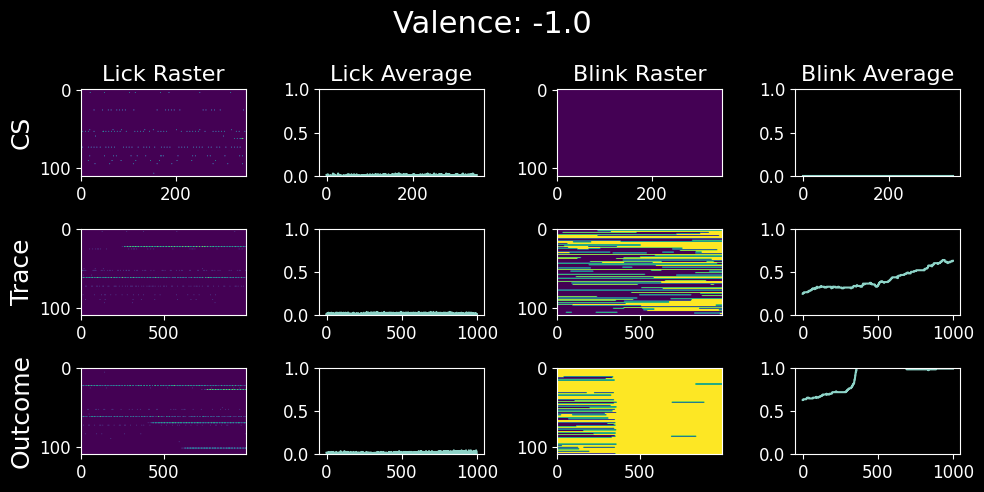

Valence: -1.0
  Lick CS: 0.008
  Lick Trace: 0.012
  Lick Outcome: 0.015


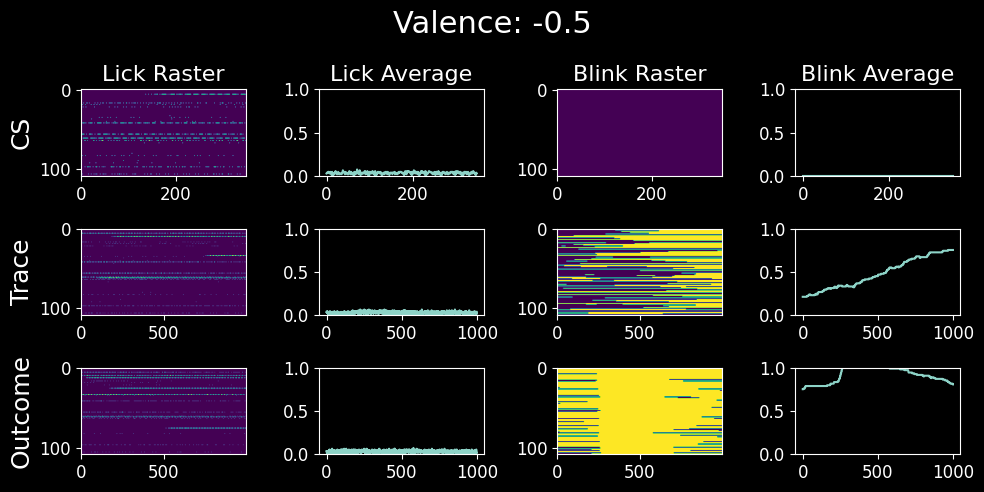

Valence: -0.5
  Lick CS: 0.033
  Lick Trace: 0.028
  Lick Outcome: 0.031


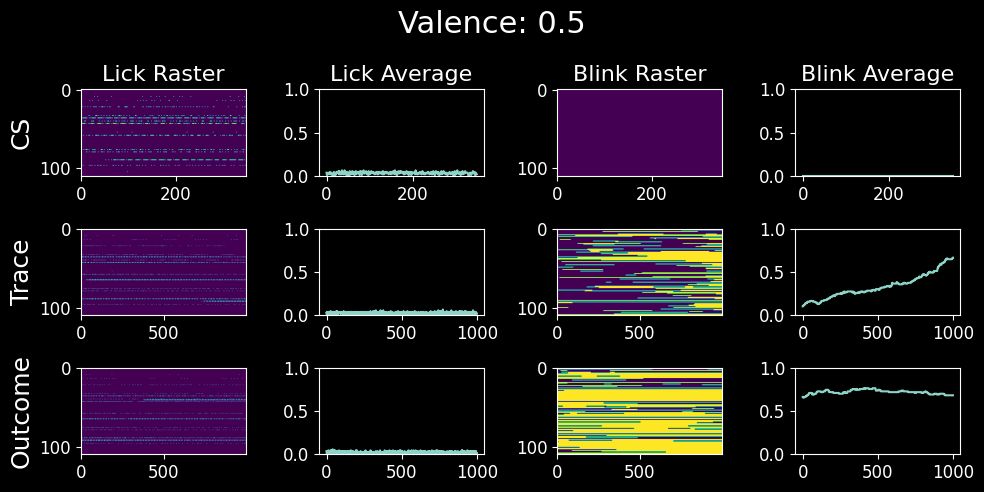

Valence: 0.5
  Lick CS: 0.032
  Lick Trace: 0.022
  Lick Outcome: 0.02


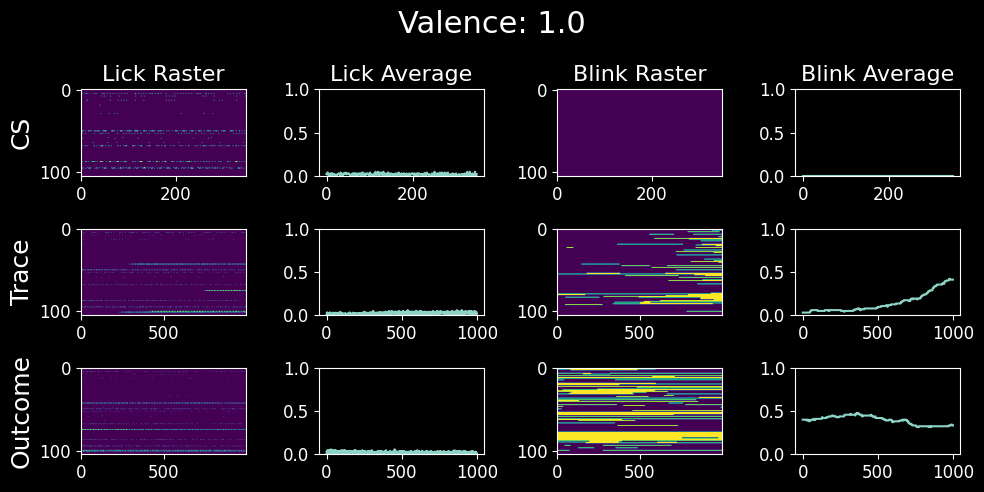

Valence: 1.0
  Lick CS: 0.017
  Lick Trace: 0.02
  Lick Outcome: 0.021


In [15]:
from analyses.beh_summary_panels import valence_panels
valence_panels(session_df_correct)

In [16]:
session_df_correct[['trial_num', 'block', 'valence', 'fractal_chosen', 
										'fractal_not_chosen', 'lick_duration', 'blink_duration_offscreen', 
										'eye_distance']]

trial_num  block  valence fractal_chosen fractal_not_chosen  \
0            1      1      0.5     _fractal_B         _fractal_B   
1            2      1      1.0     _fractal_A         _fractal_A   
3            4      1     -0.5     _fractal_C         _fractal_C   
5            6      1     -0.5     _fractal_C         _fractal_C   
6            7      1      0.5     _fractal_B         _fractal_B   
7            8      1      1.0     _fractal_A         _fractal_A   
9           10      1      0.5     _fractal_B         _fractal_B   
13          14      1     -1.0     _fractal_D         _fractal_D   
16          17      1      1.0     _fractal_A         _fractal_D   
18          19      1     -0.5     _fractal_C         _fractal_C   
19          20      1     -1.0     _fractal_D         _fractal_D   
20          21      1     -1.0     _fractal_D         _fractal_D   
22          23      1      1.0     _fractal_A         _fractal_A   
27          28      1     -1.0     _fractal_D         _fractal_D   
28          29      1      0.5     _fractal_B         _fractal_B   
29          30      1      0.5     _fractal_B         _fractal_B   
31          32      1      1.0     _fractal_A         _fractal_A   
32          33      1     -0.5     _fractal_C         _fractal_C   
33          34      1      1.0     _fractal_A         _fractal_B   
34          35      1      1.0     _fractal_A         _fractal_A   
35          36      1      1.0     _fractal_A         _fractal_B   
37          38      1     -0.5     _fractal_C         _fractal_C   
38          39      1      1.0     _fractal_A         _fractal_A   
39          40      1     -1.0     _fractal_D         _fractal_C   
40          41      1      0.5     _fractal_B         _fractal_B   
41          42      1     -0.5     _fractal_C         _fractal_C   
43          44      1      1.0     _fractal_A         _fractal_A   
46          47      1     -0.5     _fractal_C         _fractal_C   
47          48      1     -1.0     _fractal_D         _fractal_D   
50          51      1     -1.0     _fractal_D         _fractal_D   
51          52      1      1.0     _fractal_A         _fractal_A   
56          57      1     -1.0     _fractal_D         _fractal_D   
57          58      1      1.0     _fractal_A         _fractal_D   
58          59      1      1.0     _fractal_A         _fractal_B   
62          63      1     -1.0     _fractal_D         _fractal_D   
63          64      1      1.0     _fractal_A         _fractal_A   
64          65      1     -0.5     _fractal_C         _fractal_C   
65          66      1     -0.5     _fractal_C         _fractal_C   
66          67      1      0.5     _fractal_B         _fractal_B   
68          69      1     -1.0     _fractal_D         _fractal_D   
69          70      1     -0.5     _fractal_C         _fractal_C   
70          71      1      0.5     _fractal_B         _fractal_B   
73          74      1     -1.0     _fractal_D         _fractal_D   
74          75      1      1.0     _fractal_A         _fractal_A   
75          76      1      0.5     _fractal_B         _fractal_B   
79          80      1      1.0     _fractal_A         _fractal_A   
82          83      1     -1.0     _fractal_D         _fractal_D   
84          85      1     -0.5     _fractal_C         _fractal_C   
85          86      1      0.5     _fractal_B         _fractal_B   
86          87      1     -1.0     _fractal_D         _fractal_D   
87          88      1      1.0     _fractal_A         _fractal_A   
88          89      1      1.0     _fractal_A         _fractal_A   
89          90      1      0.5     _fractal_B         _fractal_B   
92          93      1      1.0     _fractal_A         _fractal_A   
93          94      1     -0.5     _fractal_C         _fractal_C   
94          95      1     -0.5     _fractal_C         _fractal_C   
95          96      1     -1.0     _fractal_D         _fractal_D   
96          97      1     -1.0     _fractal_D         _fracta

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [19]:
session_df_correct.loc[(session_df_correct['eye_distance'] < 50) &
											 (session_df_correct['lick_duration'] > 0.8)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'fractal_not_chosen', 
		'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

Empty DataFrame
Columns: [date, trial_num, block, valence, fractal_chosen, fractal_not_chosen, lick_duration, blink_duration_offscreen, eye_distance]
Index: []

### High DEM + Blink + Eye Movement / Low Lick Trials

In [17]:
session_df_correct.loc[(session_df_correct['blink_duration_offscreen'] > 0.8) &
											 (session_df_correct['eye_distance'] > 70) & 
											 (session_df_correct['lick_duration'] < 0.2)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'fractal_not_chosen', 
		'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  block  valence fractal_chosen fractal_not_chosen  \
1    240801          2      1      1.0     _fractal_A         _fractal_A   
27   240801         28      1     -1.0     _fractal_D         _fractal_D   
93   240801         94      1     -0.5     _fractal_C         _fractal_C   
95   240801         96      1     -1.0     _fractal_D         _fractal_D   
109  240801        110      1      0.5     _fractal_B         _fractal_B   
133  240801        134      1     -0.5     _fractal_C         _fractal_C   
138  240801        139      1     -0.5     _fractal_C         _fractal_C   
143  240801        144      1      0.5     _fractal_B         _fractal_B   
150  240801        151      1      0.5     _fractal_B         _fractal_C   
164  240801        165      1     -1.0     _fractal_D         _fractal_D   
178  240801        179      1      0.5     _fractal_B         _fractal_B   
180  240801        181      2     -1.0     _fractal_C         _fractal_C   
186  240801        187      2      0.5     _fractal_A         _fractal_A   
190  240801        191      2     -0.5     _fractal_B         _fractal_B   
222  240801        223      2     -0.5     _fractal_B         _fractal_B   
230  240801        231      2     -0.5     _fractal_B         _fractal_B   
252  240801        253      2      0.5     _fractal_A         _fractal_A   
265  240801        266      2      1.0     _fractal_D         _fractal_B   
281  240801        282      2     -1.0     _fractal_C         _fractal_C   
291  240801        292      2     -1.0     _fractal_C         _fractal_C   
295  240801        296      2     -0.5     _fractal_B         _fractal_B   
324  240801        325      2     -0.5     _fractal_B         _fractal_B   
337  240801        338      2     -1.0     _fractal_C         _fractal_C   
380  240801        381      3      0.5     _fractal_D         _fractal_D   
382  240801        383      3      1.0     _fractal_C         _fractal_C   
434  240801        435      3      0.5     _fractal_D         _fractal_D   
481  240801        482      3     -0.5     _fractal_A         _fractal_A   
485  240801        486      3      0.5     _fractal_D         _fractal_D   
489  240801        490      3      0.5     _fractal_D         _fractal_D   
497  240801        498      3      0.5     _fractal_D         _fractal_D   
498  240801        499      3      0.5     _fractal_D         _fractal_A   
499  240801        500      3     -0.5     _fractal_A         _fractal_A   
503  240801        504      3      0.5     _fractal_D         _fractal_D   
505  240801        506      3      1.0     _fractal_C         _fractal_A   
539  240801        540      3     -1.0     _fractal_B         _fractal_B   
562  240801        563      4     -1.0     _fractal_A         _fractal_A   
568  240801        569      4      1.0     _fractal_B         _fractal_B   
571  240801        572      4     -1.0     _fractal_A         _fractal_A   
573  240801        574      4     -0.5     _fractal_D         _fractal_D   
577  240801        578      4     -1.0     _fractal_A         _fractal_A   
596  240801        597      4     -0.5     _fractal_D         _fractal_D   
598  240801        599      4     -0.5     _fractal_D         _fractal_D   
601  240801        602      4      1.0     _fractal_B         _fractal_B   
607  240801        608      4      0.5     _fractal_C         _fractal_C   
633  240801        634      4     -1.0     _fractal_A         _fractal_A   
634  240801        635      4     -0.5     _fractal_D         _fractal_D   
690  240801        691      4     -1.0     _fractal_A         _fractal_A   
700  240801        701      4     -0.5     _fractal_D         _fractal_D   

     lick_duration  blink_duration_offscreen  eye_distance  
1            0.000                  0.806154    732.724039  
27           0.000                  0.810000     73.796476  
93           0.000                  0.950000    218.021648  
95           0.000                  0.

In [21]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation -0.025
Lick vs. Blink Correlation 0.006
DEM vs. Blink Correlation 0.418
Pupil 0 vs. Blink Correlation 0.962


***
## Single Trial Analysis

In [22]:
trial_num_selected = 30
trial_df_selected = session_df[session_df['trial_num'] == trial_num_selected]
trial_df_selected[['correct',
										 'valence',
										 'fractal_chosen',
										 'fractal_not_chosen',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
										 'blink_duration_window',
										 'eye_distance',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

correct  valence fractal_chosen fractal_not_chosen  lick_duration  \
29        1      0.5     _fractal_B         _fractal_B            0.0   

    blink_duration_sig  blink_duration_offscreen  pupil_raster_window_avg  \
29                 0.0                  0.621538                      0.0   

    blink_duration_window  eye_distance  eye_distance Outcome Start  \
29                    0.0     64.236464     64.236464          4567   

   Reward Trigger Airpuff Trigger  
29           4573            <NA>

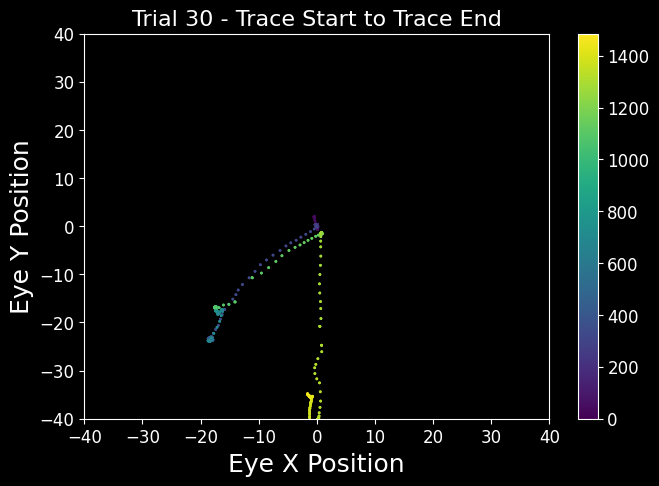

In [24]:
def plot_eye_single_trial(session_df, trial_num, epoch_start, epoch_end):
	# 3 figures, where the left one is twice as tall as the other two
	f, axarr = plt.subplots(1, 1, figsize=(7.5, 5))
	trial = session_df[session_df['trial_num'] == trial_num]
	epoch_start_time = trial[epoch_start].iloc[0]
	epoch_end_time = trial[epoch_end].iloc[0]
	trial_eye_x = trial['eye_x'].tolist()[0][epoch_start_time:epoch_end_time]
	trial_eye_y = trial['eye_y'].tolist()[0][epoch_start_time:epoch_end_time]
	# trial_eye_x = trial['eye_x'].iloc[0]
	# trial_eye_y = trial['eye_y'].iloc[0]
	# show heat map
	plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
	plt.colorbar()
	plt.xlim(-40, 40)
	plt.ylim(-40, 40)
	plt.title(f'Trial {trial_num} - {epoch_start} to {epoch_end}')
	plt.xlabel('Eye X Position')
	plt.ylabel('Eye Y Position')
	plt.show()

plot_eye_single_trial(session_df, trial_num_selected, 
											epoch_start='Trace Start', epoch_end='Trace End')

Total Eye Positions: 1500
Histogram Positions: 1398
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.0014 0.     0.     0.     0.     0.     0.     0.    ]
 [0.2217 0.2546 0.0043 0.     0.     0.     0.     0.    ]
 [0.     0.     0.01   0.     0.     0.     0.     0.    ]
 [0.     0.     0.2217 0.     0.     0.     0.     0.    ]
 [0.     0.     0.0086 0.01   0.1588 0.     0.     0.    ]
 [0.     0.     0.073  0.0057 0.     0.     0.     0.    ]
 [0.     0.     0.03   0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 83.12%
outside x,y [-40, 40]: 6.8%
  eye_heatmap_-1.0.png saved.


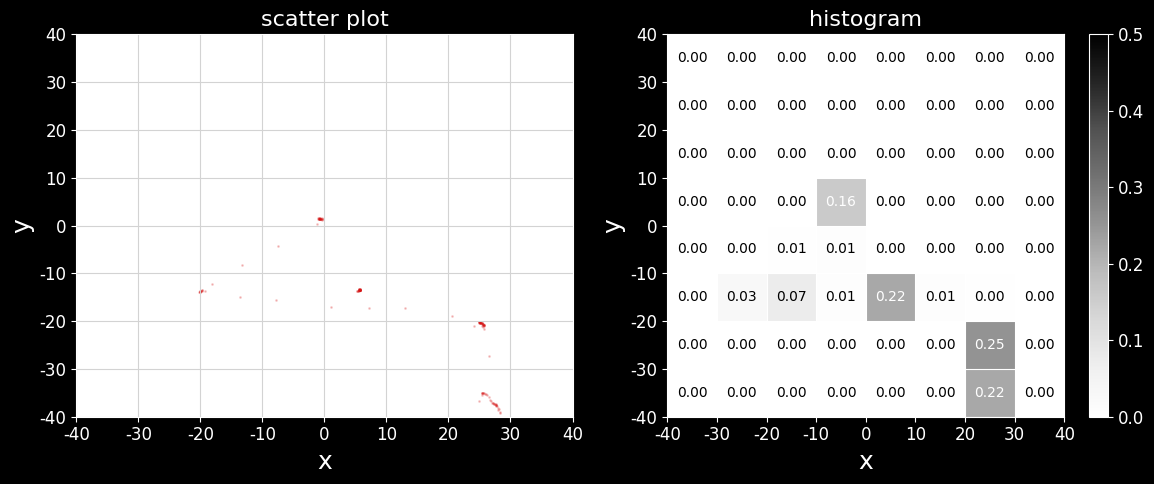

In [26]:
plt.style.use('dark_background')
from analyses.eyetracking_analysis import eyetracking_analysis
session_df_selected = session_df[session_df['trial_num'] == trial_num_selected]
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

In [14]:
import re
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX
from spike_glx.load_SGLX import load_sglx

# Manually assign the signal channel numbers
# from how you set them up on the NI PXIe-6341 board
signal_dict = {
	0: 'cam_sync',
	1: 'cam_save',
	2: 'lick',
	3: 'photodiode',
	4: 'empty'
}

# Manually assign the time epochs you care about
# which have to exist as rows in session_df
epochs = ['Start Trial', 'Fixation On', 'CS On',	
					'Trace Start', 'Outcome Start', 'End Trial']
spikeglx_obj = load_sglx(session_df, session_obj, path_obj, signal_dict, epochs)

Created new session folder: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/Aragorn_231026


AttributeError: 'SessionPath' object has no attribute 'spikeglx_dir_path'

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [18]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels_corrected(spikeglx_obj, tStart=0, tEnd=10)

SpikeGLX object missing attributes (meta, chan_dict, signal_dict)


In [ ]:
from video.wm_videos import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
					'session_obj': session_obj, 
					'trial_start': 0,
					'trial_end': len(session_obj.df),
					'epoch_start': 'Trace Start', 
					'epoch_end': 'Outcome Start', 
					'thread_flag': True}

parse_wm_videos(**kwargs)

***
## Generate MonkeyLogic Behavior Trial Videos

Found 4 marker files.
  Reading: /Users/rahimhashim/Downloads/231223_Gandalf_Segmented/gandalf_231223_125_e3v83d6DLC_resnet50_face_2Feb14shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Downloads/231223_Gandalf_Segmented/gandalf_231223_125_e3v83adDLC_resnet50_body_1Feb14shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Downloads/231223_Gandalf_Segmented/gandalf_231223_125_e3v8360DLC_resnet50_face_1Feb14shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Downloads/231223_Gandalf_Segmented/gandalf_231223_125_e3v831bDLC_resnet50_body_2Feb14shuffle1_1030000_filtered.h5
Done.
Processing gandalf - 231223 - 125 - e3v83d6
  Number of bodyparts: 55
  Overall likelihood: 0.04
Processing gandalf - 231223 - 125 - e3v83ad
  Number of bodyparts: 17
  Overall likelihood: 0.04
Processing gandalf - 231223 - 125 - e3v8360
  Number of bodyparts: 55
  Overall likelihood: 0.78
Processing gandalf - 231223 - 125 - e3v831b
  Number of bodyparts: 17
  Overall likelihood: 0.02


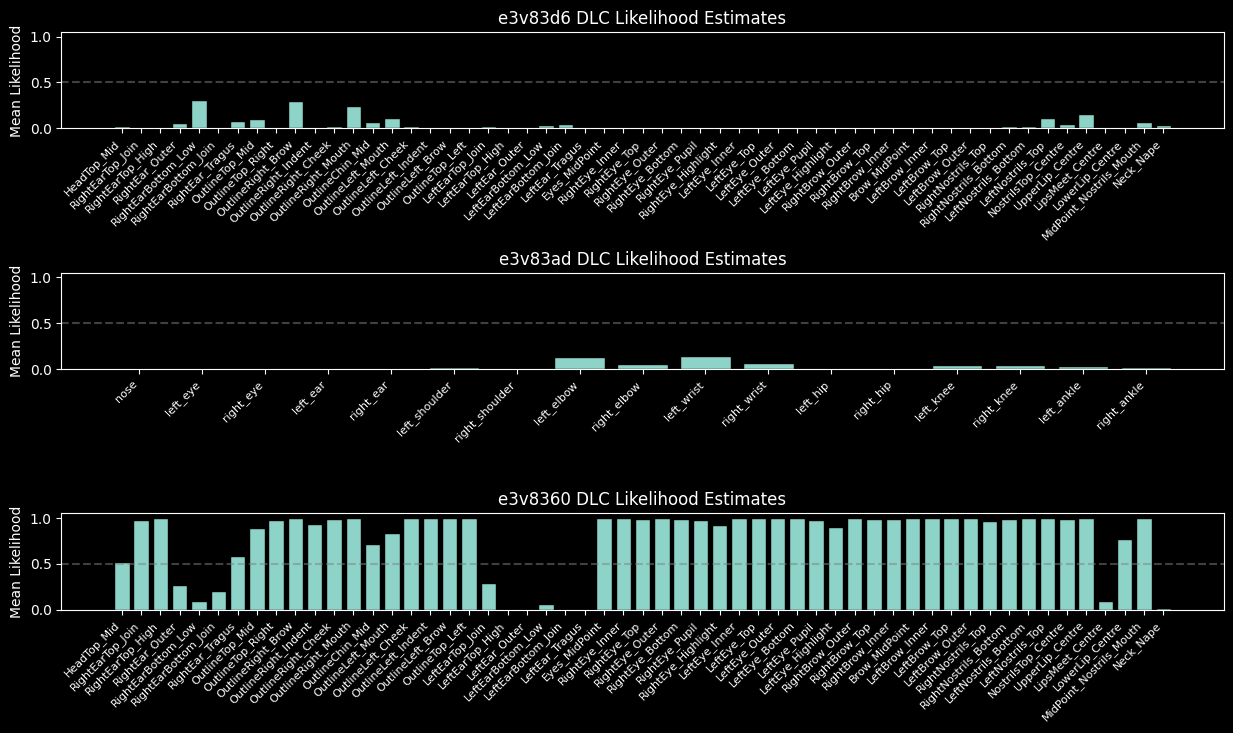

In [7]:
import warnings
import seaborn as sns
from dlc_primate.dlc_analysis import generate_marker_df, plot_bodypart_likelihoods

# turn off UserWarning: FixedFormatter should only be used together with FixedLocator
warnings.filterwarnings("ignore", category=UserWarning)
video_folder = '/Users/rahimhashim/Downloads/231223_Gandalf_Segmented'

dlc_df_dict = generate_marker_df(video_folder)
body_part_likelihoods = plot_bodypart_likelihoods(dlc_df_dict)

In [14]:
dlc_df_dict['gandalf']

defaultdict(<function dlc_primate.dlc_analysis.generate_marker_df.<locals>.<lambda>.<locals>.<lambda>()>,
            {'231223': defaultdict(dict,
                         {'125': {'e3v83d6': scorer    DLC_resnet50_face_2Feb14shuffle1_1030000                         \
                           bodyparts                              HeadTop_Mid                          
                           coords                                           x           y likelihood   
                           0                                       238.104645    6.746517   0.019366   
                           1                                       238.434494   12.514004   0.003141   
                           2                                       238.434494   13.608857   0.012241   
                           3                                       238.319702  167.478531   0.004725   
                           4                                       238.104645   14.199848   0.016294   
   

In [42]:
# monkey = session_obj.monkey
monkey = 'gandalf'
# date = session_obj.date
date = '231223'
trial = list(dlc_df_dict[monkey][date].keys())[0]
dlc_df_dict[monkey][date][trial]['e3v8360']

scorer    DLC_resnet50_face_1Feb14shuffle1_1030000                         \
bodyparts                              HeadTop_Mid                          
coords                                           x           y likelihood   
0                                       382.180695  115.604698   0.356932   
1                                       382.180695  115.604698   0.865225   
2                                       382.925385  115.663658   0.566016   
3                                       382.180695  115.822533   0.562689   
4                                       382.180695  115.921967   0.201055   
...                                            ...         ...        ...   
1648                                    382.936249  114.512169   0.695246   
1649                                    383.069977  114.512169   0.685964   
1650                                    383.069977  114.874527   0.758622   
1651                                    382.690796  114.512169   0.972724   
1652                                    382.460876  111.966904   0.767834   

scorer                                                                        \
bodyparts RightEarTop_Join                       RightEarTop_High              
coords                   x          y likelihood                x          y   
0               255.355743  63.160858   0.984795       467.605255  60.516796   
1               479.598022  63.438206   0.980416       467.770966  60.639275   
2               479.693054  63.438206   0.735375       468.015198  60.639275   
3               479.598022  63.438206   0.943955       468.101257  61.121029   
4               479.693054  63.438206   0.958295       468.101257  61.005730   
...                    ...        ...        ...              ...        ...   
1648            480.917969  62.989796   0.999689       468.711365  60.971741   
1649            480.917969  62.810738   0.999561       469.160614  60.971741   
1650            480.845978  63.530060   0.917362       469.160614  61.057457   
1651            479.621826  61.997868   0.999130       467.353424  61.057457   
1652            478.961853  61.645500   0.998825       467.250854  60.971741   

scorer                                                                        \
bodyparts            RightEar_Outer                       RightEarBottom_Low   
coords    likelihood              x          y likelihood                  x   
0           0.997946     456.517273  57.728981   0.234261         236.440170   
1           0.996707     456.517273  58.396900   0.093078         236.440170   
2           0.921384     456.517273  59.158802   0.012576         455.934601   
3           0.998290     456.967255  59.248459   0.178734         236.440170   
4           0.976423     456.588531  59.248459   0.015706         235.883423   
...              ...            ...        ...        ...                ...   
1648        0.999823     455.400085  60.106190   0.184808         628.919922   
1649        0.999940     456.098267  59.800270   0.466089         629.204163   
1650        0.992872     456.339905  59.800270   0.043056         629.440186   
1651        0.999694     456.339905  59.800270   0.168840         629.204163   
1652        0.999722     456.339905  59.331398   0.168336         629.204163   

scorer                                                                      \
bodyparts                        RightEarBottom_Join                         
coords              y likelihood                   x          y likelihood   
0           86.991920   0.003580          465.696350  77.893410   0.062148   
1           90.908463   0.033065          466.007782  85.996338   0.105415   
2           92.322021   0.033105          466.574280  85.996338   0.136503   
3          220.410217   0.135901          467.053101  80.874619   0.117228   
4          220.410217   0.009412          467.086517  80.874619   0.064208   
...               ...        ...                 ...   

Adding gandalf 231223 125 e3v83d6 OutlineRight_Brow - 86 poses
  Average (x,y): 422.57 387.58
Skipping gandalf 231223 125 e3v83d6 OutlineRight_Mouth - 6 poses
Adding gandalf 231223 125 e3v83d6 UpperLip_Centre - 90 poses
  Average (x,y): 448.94 131.82
Adding gandalf 231223 125 e3v83d6 LeftNostrils_Top - 30 poses
  Average (x,y): 431.73 219.64
Skipping gandalf 231223 125 e3v83d6 MidPoint_Nostrils_Mouth - 6 poses
Skipping gandalf 231223 125 e3v83d6 NostrilsTop_Centre - 7 poses
Skipping gandalf 231223 125 e3v83d6 OutlineLeft_Cheek - 7 poses
Skipping gandalf 231223 125 e3v83d6 LeftNostrils_Bottom - 0 poses
Skipping gandalf 231223 125 e3v83d6 RightNostrils_Bottom - 0 poses
Skipping gandalf 231223 125 e3v83d6 Brow_MidPoint - 0 poses
Skipping gandalf 231223 125 e3v83d6 LeftBrow_Inner - 1 poses
Skipping gandalf 231223 125 e3v83d6 OutlineRight_Cheek - 0 poses
Skipping gandalf 231223 125 e3v83d6 OutlineLeft_Brow - 0 poses
Skipping gandalf 231223 125 e3v83d6 RightEarTop_High - 0 poses
Skipping gan

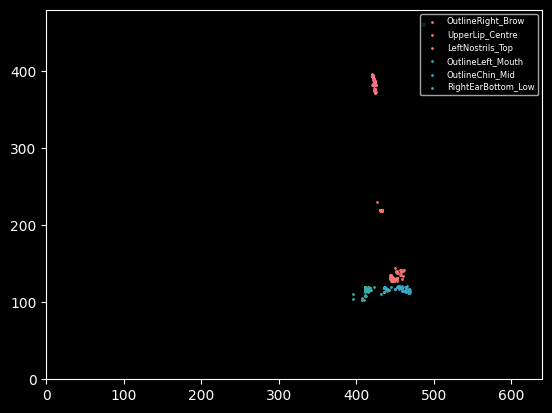

Skipping gandalf 231223 125 e3v83ad left_wrist - 4 poses
Skipping gandalf 231223 125 e3v83ad left_elbow - 8 poses
Skipping gandalf 231223 125 e3v83ad right_wrist - 0 poses
Skipping gandalf 231223 125 e3v83ad right_elbow - 0 poses
Skipping gandalf 231223 125 e3v83ad right_knee - 0 poses
Skipping gandalf 231223 125 e3v83ad left_knee - 0 poses
Skipping gandalf 231223 125 e3v83ad left_ankle - 0 poses
Skipping gandalf 231223 125 e3v83ad left_shoulder - 0 poses
Skipping gandalf 231223 125 e3v83ad right_ankle - 0 poses
Skipping gandalf 231223 125 e3v83ad left_hip - 0 poses
Skipping gandalf 231223 125 e3v83ad right_shoulder - 0 poses
Skipping gandalf 231223 125 e3v83ad right_hip - 0 poses
Skipping gandalf 231223 125 e3v83ad nose - 0 poses
Skipping gandalf 231223 125 e3v83ad left_eye - 0 poses
Skipping gandalf 231223 125 e3v83ad right_eye - 0 poses
Skipping gandalf 231223 125 e3v83ad right_ear - 0 poses
Skipping gandalf 231223 125 e3v83ad left_ear - 0 poses


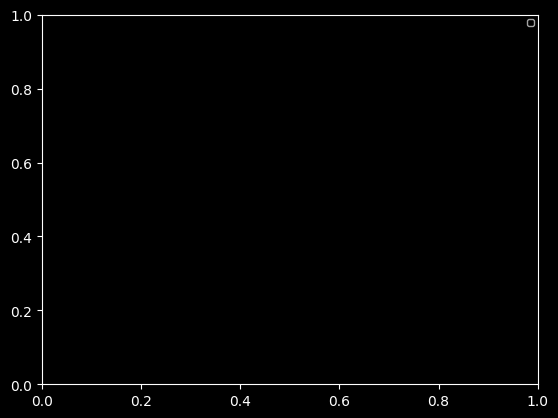

Adding gandalf 231223 125 e3v8360 OutlineRight_Brow - 1646 poses
  Average (x,y): 362.59 296.38
Adding gandalf 231223 125 e3v8360 OutlineRight_Mouth - 1646 poses
  Average (x,y): 326.26 149.76
Adding gandalf 231223 125 e3v8360 UpperLip_Centre - 1652 poses
  Average (x,y): 280.05 154.07
Adding gandalf 231223 125 e3v8360 LeftNostrils_Top - 1653 poses
  Average (x,y): 263.82 205.83
Adding gandalf 231223 125 e3v8360 MidPoint_Nostrils_Mouth - 1650 poses
  Average (x,y): 278.19 169.23
Adding gandalf 231223 125 e3v8360 NostrilsTop_Centre - 1631 poses
  Average (x,y): 280.01 208.37
Adding gandalf 231223 125 e3v8360 OutlineLeft_Cheek - 1653 poses
  Average (x,y): 217.13 175.86
Adding gandalf 231223 125 e3v8360 LeftNostrils_Bottom - 1642 poses
  Average (x,y): 275.4 188.5
Adding gandalf 231223 125 e3v8360 RightNostrils_Bottom - 1627 poses
  Average (x,y): 286.57 189.24
Adding gandalf 231223 125 e3v8360 Brow_MidPoint - 1652 poses
  Average (x,y): 273.93 296.43
Adding gandalf 231223 125 e3v8360 Le

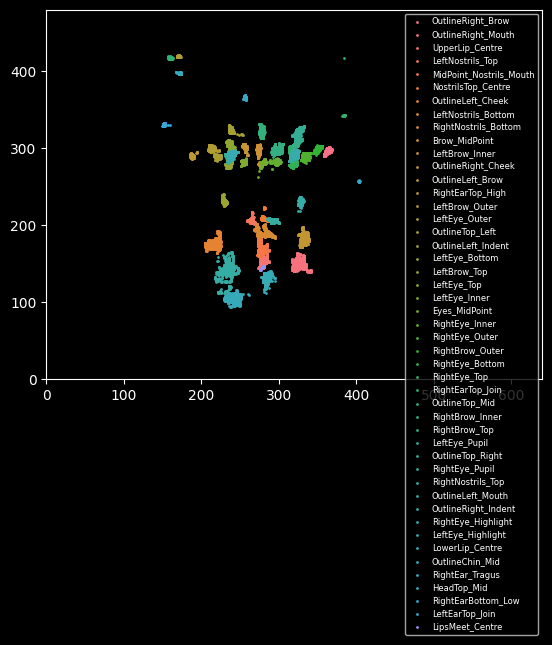

Skipping gandalf 231223 125 e3v831b left_wrist - 0 poses
Adding gandalf 231223 125 e3v831b left_elbow - 67 poses
  Average (x,y): 276.17 26.82
Skipping gandalf 231223 125 e3v831b right_wrist - 0 poses
Skipping gandalf 231223 125 e3v831b right_elbow - 0 poses
Skipping gandalf 231223 125 e3v831b right_knee - 0 poses
Skipping gandalf 231223 125 e3v831b left_knee - 2 poses
Skipping gandalf 231223 125 e3v831b left_ankle - 0 poses
Skipping gandalf 231223 125 e3v831b left_shoulder - 0 poses
Skipping gandalf 231223 125 e3v831b right_ankle - 0 poses
Skipping gandalf 231223 125 e3v831b left_hip - 0 poses
Skipping gandalf 231223 125 e3v831b right_shoulder - 0 poses
Skipping gandalf 231223 125 e3v831b right_hip - 0 poses
Skipping gandalf 231223 125 e3v831b nose - 0 poses
Skipping gandalf 231223 125 e3v831b left_eye - 0 poses
Skipping gandalf 231223 125 e3v831b right_eye - 0 poses
Skipping gandalf 231223 125 e3v831b right_ear - 0 poses
Skipping gandalf 231223 125 e3v831b left_ear - 0 poses


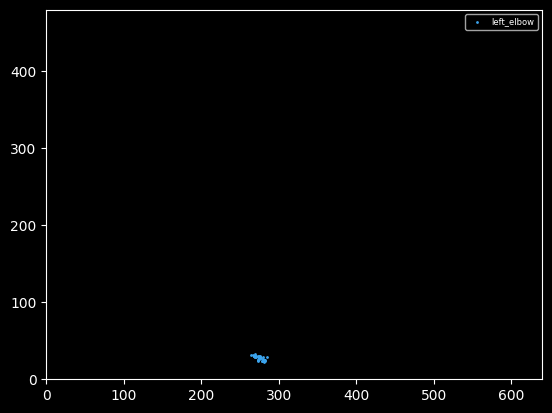

In [46]:
from collections import OrderedDict
import matplotlib.pyplot as plt

# plot all the x,y positions for top 10 body parts
all_body_parts = list(body_part_likelihoods.keys())
# selected_body_parts = list(body_part_likelihoods.keys()[:10])
selected_body_parts = [body_part for body_part in all_body_parts]
# make colormap of length 'selected_body_parts'
colors = sns.color_palette('husl', len(selected_body_parts))
# make dictionary from colors
color_dict = {selected_body_parts[i]: colors[i] for i in range(len(selected_body_parts))}

cameras = dlc_df_dict[monkey][date][trial].keys()

for camera in cameras:
	for monkey in dlc_df_dict.keys():
		for date in dlc_df_dict[monkey].keys():
			for trial in dlc_df_dict[monkey][date].keys():
		
					f, ax = plt.subplots(1,1)
					scorer = dlc_df_dict[monkey][date][trial][camera].columns.get_level_values(0).unique()[0]
					body_parts = dlc_df_dict[monkey][date][trial][camera].columns.get_level_values(1).unique()
					for b_index, body_part in enumerate(all_body_parts):
						if body_part in body_parts:
							df = dlc_df_dict[monkey][date][trial][camera][scorer][body_part]
							x = df['x'].tolist()
							y = df['y'].tolist()
							likelihood = df['likelihood'].tolist()
							# filter indice of all x, y positions where likelihood < 0.8
							indices = [i for i, l in enumerate(likelihood) if l < 0.8]
							# filter x,y positions where likelihood < 0.6
							x = [640 - x[i] for i in range(len(x)) if i not in indices]
							if len(x) < 10:
								print(f'Skipping {monkey} {date} {trial} {camera} {body_part} - {len(x)} poses')
								continue
							x_mean = np.mean(x)
							y = [480 - y[i] for i in range(len(y)) if i not in indices]
							y_mean = np.mean(y)
							print(f'Adding {monkey} {date} {trial} {camera} {body_part} - {len(x)} poses')
							print(f'  Average (x,y): {round(x_mean, 2)} {round(y_mean, 2)}')
							# plot x,y positions
							plt.scatter(x, y, color=color_dict[body_part], s=1, label=body_part)
							plt.xlim(0, 640)
							plt.ylim(0, 480)
					break
	handles, labels = plt.gca().get_legend_handles_labels()
	by_label = OrderedDict(zip(labels, handles))
	plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=6)
	plt.show()

In [41]:
dlc_df_dict[monkey]

defaultdict(<function dlc_primate.dlc_analysis.generate_marker_df.<locals>.<lambda>.<locals>.<lambda>()>,
            {'240618': defaultdict(dict, {})})

In [12]:
epochs = [epoch for epoch in behavioral_code_dict.values()]
print('Epochs:')
[print(f'  {epochs}') for epochs in epochs]
pass

Epochs:
  Start Trial
  Fixation On
  Fixation Success
  CS On
  Fixation Off
  Trace Start
  Trace End
  Outcome Start
  Reward Trigger
  Airpuff Trigger
  Outcome
  Outcome End
  Manual Reward
  End Trial


### Canny Video Generation

In [17]:
from video.canny_detection import canny_detection

video_files = [file_name for file_name in os.listdir(video_folder) if file_name.endswith('.mp4') and 'filtered' not in file_name]
for video in video_files:
	# get trial number
	trial_index = int(video.split('_')[-2])
	print(f'Trial Index: {trial_index}')
	trial = session_df[session_df['trial_num'] == trial_index+1]
	video_path = os.path.join(video_folder, video)
	canny_detection(trial, epochs, video_path, slowdown=4)

Trial Index: 125


NameError: name 'epochs' is not defined

### Eye And Lick Videos

In [10]:
from video.ml_videos import generate_ml_behavior_videos
trial_num_selected = 30
generate_ml_behavior_videos(session_df, 
														session_obj, 
														trial_num_selected, 
														epoch_start='Start Trial', 
														epoch_end='end',
														subsample=10,
														slowdown=4)

Generating video for trial 30
  Number of Frames: 1342
  Parsing Analog Data: Epochs 1570 to 11187
  Subsampling Analog Data: (1000/10) fps


Trial 30 frame:   0%|          | 0/962 [00:00<?, ?it/s]

  Saving Frames to /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/trial_29
Deleting existing video: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/eye_0029.mp4
Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/eye_0029.mp4
   Slowing Video by: 4x
  FPS: 25.0


Trial 29 eye:   0%|          | 0/962 [00:00<?, ?it/s]

Deleting existing video: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/lick_0029.mp4
Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/lick_0029.mp4
   Slowing Video by: 4x
  FPS: 25.0


Trial 29 lick:   0%|          | 0/962 [00:00<?, ?it/s]

Deleting image folder: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/trial_29


***
## Save Dataframe

In [148]:
import pickle
from config.h5_helper import pickler

# dest_path = os.path.join('..', 'data', '_'.join([session_obj.monkey, session_obj.date]))
data_path = os.path.join(os.getcwd(), '_data', '_'.join([session_obj.monkey,session_obj.date]))

pickler(True, 
	save_path=data_path, 
	session_df=session_obj.df, 
	monkey_input='aragorn',
	experiment_name='airpuff',
	error_dict=error_dict, 
	behavioral_code_dict=behavioral_code_dict)

Saving .pickle files to: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/aragorn_240411
  Pickling 240411_aragorn_airpuff_behave.pkl
  Total time to pickle: 0.9019 sec


In [28]:
# load pickle
import pickle
import pandas as pd
path = '/Users/rahimhashim/Downloads/gandalf_231223/231223_gandalf_VR_behave.pkl'
with open(path, 'rb') as f:
	data = pickle.load(f)

data.keys()

dict_keys(['data_frame', 'error_dict', 'behavioral_code_dict'])

In [29]:
df = data['data_frame']

In [35]:
list(df.iloc[124].keys())

['date',
 'session_num',
 'subject',
 'Trial',
 'TrialWithinBlock',
 'TrialError',
 'ReactionTime',
 'AbsoluteTrialStartTime',
 'TrialDateTime',
 'BehavioralCodes.CodeTimes',
 'BehavioralCodes.CodeNumbers',
 'BehavioralCodes.TrialEpochTimes.AutomaticRotation_1.0',
 'BehavioralCodes.TrialEpochTimes.AutomaticRotation_1.1',
 'BehavioralCodes.TrialEpochTimes.CuedNavigation.0',
 'BehavioralCodes.TrialEpochTimes.CuedNavigation.1',
 'BehavioralCodes.TrialEpochTimes.PreRotationDelay.0',
 'BehavioralCodes.TrialEpochTimes.PreRotationDelay.1',
 'BehavioralCodes.TrialEpochTimes.AutomaticRotation_2.0',
 'BehavioralCodes.TrialEpochTimes.AutomaticRotation_2.1',
 'BehavioralCodes.TrialEpochTimes.ChoiceLocationApproach.0',
 'BehavioralCodes.TrialEpochTimes.ChoiceLocationApproach.1',
 'BehavioralCodes.TrialEpochTimes.PreChoiceDelay.0',
 'BehavioralCodes.TrialEpochTimes.PreChoiceDelay.1',
 'BehavioralCodes.TrialEpochTimes.Choice.0',
 'BehavioralCodes.TrialEpochTimes.Choice.1',
 'BehavioralCodes.TrialEpoc

In [37]:
len(df.iloc[124]['RestructuredAnalog.Eye.0'])

15601